# Predicting RainTomorrow (Classification Problem)

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
from scipy import stats
import pickle

import warnings
warnings.filterwarnings('ignore')

In [125]:
df =pd.read_csv(r'https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Rainfall%20Forecast/Rainfall.csv')
df =df.sample(frac =1)
df.head(10)

Date      Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
7456  2012-06-04  PerthAirport     15.6     21.7       0.0          4.0   
2037  2014-11-10     Newcastle     17.1     25.0       0.0          NaN   
702   2010-11-03        Albury     10.7     18.0       0.0          NaN   
3755  2016-01-09   Williamtown     16.5     24.3       0.0          NaN   
8010  2014-02-07  PerthAirport     19.5     31.5       0.0         10.8   
3458  2008-12-22    Wollongong     16.4     22.9       0.0          NaN   
5527  2010-04-19     Melbourne     16.1     27.6       0.0          6.0   
1613  2013-09-12     Newcastle      8.9     23.2       0.0          NaN   
8408  2017-06-09         Uluru      3.4     19.8       0.0          NaN   
1658  2013-10-27     Newcastle      NaN     24.7       0.0          NaN   

      Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
7456       0.9          NE           41.0         NE  ...        40.0   
2037       NaN         NaN            NaN        NaN  ...        69.0   
702        NaN         WNW           35.0          W  ...        63.0   
3755       NaN           E           28.0          S  ...        70.0   
8010      12.7          SW           48.0        ESE  ...        49.0   
3458       NaN          NE           63.0          N  ...        63.0   
5527       6.6           N           46.0          N  ...        66.0   
1613       NaN         NaN            NaN         SW  ...        45.0   
8408       NaN           E           43.0        ESE  ...        54.0   
1658       NaN         NaN            NaN        NaN  ...         NaN   

      Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
7456         36.0       1019.3       1017.4       7.0       7.0     18.1   
2037         76.0          NaN          NaN       7.0       7.0     21.8   
702          49.0       1019.3       1018.2       NaN       5.0     14.4   
3755         62.0       1022.1       1019.4       NaN       7.0     21.1   
8010         40.0       1012.3       1009.3       0.0       0.0     24.7   
3458         67.0       1018.4       1014.2       NaN       NaN     20.6   
5527         37.0       1023.8       1020.6       6.0       7.0     17.5   
1613         39.0          NaN          NaN       1.0       1.0     18.6   
8408         23.0       1031.8       1027.7       NaN       NaN      8.7   
1658         52.0          NaN          NaN       NaN       6.0      NaN   

      Temp3pm  RainToday  RainTomorrow  
7456     21.4         No            No  
2037     23.0         No            No  
702      16.9         No            No  
3755     23.4         No            No  
8010     29.0         No            No  
3458     21.7         No            No  
5527     27.3         No            No  
1613     21.5         No            No  
8408     18.9         No            No  
1658     23.4         No            No  

[10 rows x 23 columns]

In [126]:
df.shape

(8425, 23)

In [127]:
df.describe()

MinTemp      MaxTemp     Rainfall  Evaporation     Sunshine  \
count  8350.000000  8365.000000  8185.000000  4913.000000  4431.000000   
mean     13.193305    23.859976     2.805913     5.389395     7.632205   
std       5.403596     6.136408    10.459379     5.044484     3.896235   
min      -2.000000     8.200000     0.000000     0.000000     0.000000   
25%       9.200000    19.300000     0.000000     2.600000     4.750000   
50%      13.300000    23.300000     0.000000     4.600000     8.700000   
75%      17.400000    28.000000     1.000000     7.000000    10.700000   
max      28.500000    45.500000   371.000000   145.000000    13.900000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
count    7434.000000   8349.000000   8318.000000  8366.000000  8323.000000   
mean       40.174469     13.847646     18.533662    67.822496    51.249790   
std        14.665721     10.174579      9.766986    16.833283    18.423774   
min         7.000000      0.000000      0.000000    10.000000     6.000000   
25%        30.000000      6.000000     11.000000    56.000000    39.000000   
50%        39.000000     13.000000     19.000000    68.000000    51.000000   
75%        50.000000     20.000000     24.000000    80.000000    63.000000   
max       107.000000     63.000000     83.000000   100.000000    99.000000   

       Pressure9am  Pressure3pm     Cloud9am     Cloud3pm      Temp9am  \
count  7116.000000  7113.000000  6004.000000  5970.000000  8369.000000   
mean   1017.640233  1015.236075     4.566622     4.503183    17.762015   
std       6.828699     6.766681     2.877658     2.731659     5.627035   
min     989.800000   982.900000     0.000000     0.000000     1.900000   
25%    1013.000000  1010.400000     1.000000     2.000000    13.800000   
50%    1017.700000  1015.300000     5.000000     5.000000    17.800000   
75%    1022.300000  1019.800000     7.000000     7.000000    21.900000   
max    1039.000000  1036.000000     8.000000     8.000000    39.400000   

           Temp3pm  
count  8329.000000  
mean     22.442934  
std       5.980020  
min       7.300000  
25%      18.000000  
50%      21.900000  
75%      26.400000  
max      44.100000

In [128]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

__There are many null values present in the dataset. We will delete null values from the target column.__

In [129]:
# Droping null values from the target variable
df.dropna(subset =['RainTomorrow'], inplace =True)

In [130]:
# Again checking null values
df.isnull().sum()

Date                0
Location            0
MinTemp            60
MaxTemp            35
Rainfall          107
Evaporation      3419
Sunshine         3880
WindGustDir       953
WindGustSpeed     953
WindDir9am        809
WindDir3pm        286
WindSpeed9am       62
WindSpeed3pm       86
Humidity9am        44
Humidity3pm        83
Pressure9am      1292
Pressure3pm      1293
Cloud9am         2291
Cloud3pm         2331
Temp9am            41
Temp3pm            77
RainToday         107
RainTomorrow        0
dtype: int64

__We will delete records where 40% value are null. As imputing 40% of data may create biasness in the dataset._

In [131]:
df.dropna(subset =['Sunshine'], inplace =True)

In [132]:
# Again checking null values
df.isnull().sum()

Date               0
Location           0
MinTemp            1
MaxTemp            1
Rainfall          66
Evaporation       25
Sunshine           0
WindGustDir       66
WindGustSpeed     66
WindDir9am        72
WindDir3pm        16
WindSpeed9am       2
WindSpeed3pm       2
Humidity9am        2
Humidity3pm        5
Pressure9am        3
Pressure3pm        6
Cloud9am         308
Cloud3pm         335
Temp9am            2
Temp3pm            3
RainToday         66
RainTomorrow       0
dtype: int64

In [133]:
df.shape

(4306, 23)

In [134]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [135]:
# Imputing null values using Iterative Imputers
itr_impt =IterativeImputer()
for i in df:
    if df[i].dtypes !='object':
        df[i] =itr_impt.fit_transform(df[i].values.reshape(-1, 1))
    
df

Date      Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
7456  2012-06-04  PerthAirport     15.6     21.7       0.0          4.0   
8010  2014-02-07  PerthAirport     19.5     31.5       0.0         10.8   
5527  2010-04-19     Melbourne     16.1     27.6       0.0          6.0   
4872  2010-09-22     Melbourne      9.8     16.6       0.0          0.8   
5324  2012-01-17     Melbourne     23.7     34.3       0.0         18.4   
...          ...           ...      ...      ...       ...          ...   
1080  2009-08-30  CoffsHarbour     19.3     25.1       0.0          4.2   
5447  2010-01-29     Melbourne     17.5     23.5       0.0          7.0   
967   2009-05-09  CoffsHarbour     11.5     21.9       0.4          3.2   
8202  2012-05-11        Darwin     22.9     32.0       0.0          2.6   
4731  2010-05-04     Melbourne     11.6     23.5       0.0          7.0   

      Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
7456       0.9          NE           41.0         NE  ...        40.0   
8010      12.7          SW           48.0        ESE  ...        49.0   
5527       6.6           N           46.0          N  ...        66.0   
4872       1.2         SSE           33.0          S  ...        64.0   
5324      11.4           N           76.0          N  ...        41.0   
...        ...         ...            ...        ...  ...         ...   
1080       4.1           W           43.0          W  ...        32.0   
5447       7.5         SSE           48.0          S  ...        70.0   
967       10.2          SW           35.0        WSW  ...        63.0   
8202       9.3         ESE           39.0          E  ...        76.0   
4731       6.8           N           80.0          N  ...        43.0   

      Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
7456         36.0       1019.3       1017.4       7.0       7.0     18.1   
8010         40.0       1012.3       1009.3       0.0       0.0     24.7   
5527         37.0       1023.8       1020.6       6.0       7.0     17.5   
4872         53.0       1028.2       1026.4       7.0       7.0     12.9   
5324         26.0       1016.7       1013.0       4.0       7.0     26.1   
...           ...          ...          ...       ...       ...      ...   
1080         38.0       1011.2       1010.5       5.0       5.0     23.2   
5447         45.0       1014.8       1015.9       7.0       2.0     18.9   
967          50.0       1022.5       1018.7       2.0       1.0     18.5   
8202         47.0       1012.2       1009.2       5.0       6.0     26.2   
4731         37.0       1011.4       1006.5       6.0       7.0     19.9   

      Temp3pm  RainToday  RainTomorrow  
7456     21.4         No            No  
8010     29.0         No            No  
5527     27.3         No            No  
4872     14.7         No            No  
5324     32.8         No            No  
...       ...        ...           ...  
1080     21.7         No            No  
5447     21.6         No            No  
967      21.3         No            No  
8202     31.2         No            No  
4731     22.9         No           Yes  

[4306 rows x 23 columns]

In [136]:
# Again checking null values
df.isnull().sum()

Date              0
Location          0
MinTemp           0
MaxTemp           0
Rainfall          0
Evaporation       0
Sunshine          0
WindGustDir      66
WindGustSpeed     0
WindDir9am       72
WindDir3pm       16
WindSpeed9am      0
WindSpeed3pm      0
Humidity9am       0
Humidity3pm       0
Pressure9am       0
Pressure3pm       0
Cloud9am          0
Cloud3pm          0
Temp9am           0
Temp3pm           0
RainToday        66
RainTomorrow      0
dtype: int64

In [137]:
# Filling null values for object datatype
df['WindGustDir'] =df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])
df['WindDir9am'] =df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])
df['WindDir3pm'] =df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])
df['RainToday'] =df['RainToday'].fillna(df['RainToday'].mode()[0])

In [138]:
# Again checking null values
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [139]:
df.shape

(4306, 23)

In [140]:
# Resetting index
df.reset_index(drop =True, inplace =True)

In [141]:
df

Date      Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0     2012-06-04  PerthAirport     15.6     21.7       0.0          4.0   
1     2014-02-07  PerthAirport     19.5     31.5       0.0         10.8   
2     2010-04-19     Melbourne     16.1     27.6       0.0          6.0   
3     2010-09-22     Melbourne      9.8     16.6       0.0          0.8   
4     2012-01-17     Melbourne     23.7     34.3       0.0         18.4   
...          ...           ...      ...      ...       ...          ...   
4301  2009-08-30  CoffsHarbour     19.3     25.1       0.0          4.2   
4302  2010-01-29     Melbourne     17.5     23.5       0.0          7.0   
4303  2009-05-09  CoffsHarbour     11.5     21.9       0.4          3.2   
4304  2012-05-11        Darwin     22.9     32.0       0.0          2.6   
4305  2010-05-04     Melbourne     11.6     23.5       0.0          7.0   

      Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0          0.9          NE           41.0         NE  ...        40.0   
1         12.7          SW           48.0        ESE  ...        49.0   
2          6.6           N           46.0          N  ...        66.0   
3          1.2         SSE           33.0          S  ...        64.0   
4         11.4           N           76.0          N  ...        41.0   
...        ...         ...            ...        ...  ...         ...   
4301       4.1           W           43.0          W  ...        32.0   
4302       7.5         SSE           48.0          S  ...        70.0   
4303      10.2          SW           35.0        WSW  ...        63.0   
4304       9.3         ESE           39.0          E  ...        76.0   
4305       6.8           N           80.0          N  ...        43.0   

      Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0            36.0       1019.3       1017.4       7.0       7.0     18.1   
1            40.0       1012.3       1009.3       0.0       0.0     24.7   
2            37.0       1023.8       1020.6       6.0       7.0     17.5   
3            53.0       1028.2       1026.4       7.0       7.0     12.9   
4            26.0       1016.7       1013.0       4.0       7.0     26.1   
...           ...          ...          ...       ...       ...      ...   
4301         38.0       1011.2       1010.5       5.0       5.0     23.2   
4302         45.0       1014.8       1015.9       7.0       2.0     18.9   
4303         50.0       1022.5       1018.7       2.0       1.0     18.5   
4304         47.0       1012.2       1009.2       5.0       6.0     26.2   
4305         37.0       1011.4       1006.5       6.0       7.0     19.9   

      Temp3pm  RainToday  RainTomorrow  
0        21.4         No            No  
1        29.0         No            No  
2        27.3         No            No  
3        14.7         No            No  
4        32.8         No            No  
...       ...        ...           ...  
4301     21.7         No            No  
4302     21.6         No            No  
4303     21.3         No            No  
4304     31.2         No            No  
4305     22.9         No           Yes  

[4306 rows x 23 columns]

In [142]:
# Coverting date to datetype
df['Date'] =pd.to_datetime(df['Date'], format ='%Y-%m-%d')

In [143]:
# Checking datatype
df.dtypes

Date             datetime64[ns]
Location                 object
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
Evaporation             float64
Sunshine                float64
WindGustDir              object
WindGustSpeed           float64
WindDir9am               object
WindDir3pm               object
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Cloud9am                float64
Cloud3pm                float64
Temp9am                 float64
Temp3pm                 float64
RainToday                object
RainTomorrow             object
dtype: object

In [144]:
# Seperating Numerical and categorical columns

# Seperating numerical columns
num_cols =[]
for i in df.dtypes.index:
    if df[i].dtypes =='float64':
        num_cols.append(i)
        
# Seperating categorical columns
cat_cols =[]
for i in df.dtypes.index:
    if df[i].dtypes =='object':
        cat_cols.append(i)
        
print("Numerical Columns are :", num_cols)
print("Categorical Columns are :", cat_cols)

Numerical Columns are : ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
Categorical Columns are : ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [145]:
print("No of Numerical columns are :",len(num_cols))
print("No of Categorical columns are :",len(cat_cols))

No of Numerical columns are : 16
No of Categorical columns are : 6


## Univariate Analysis

### Checking data distribution for categorical columns

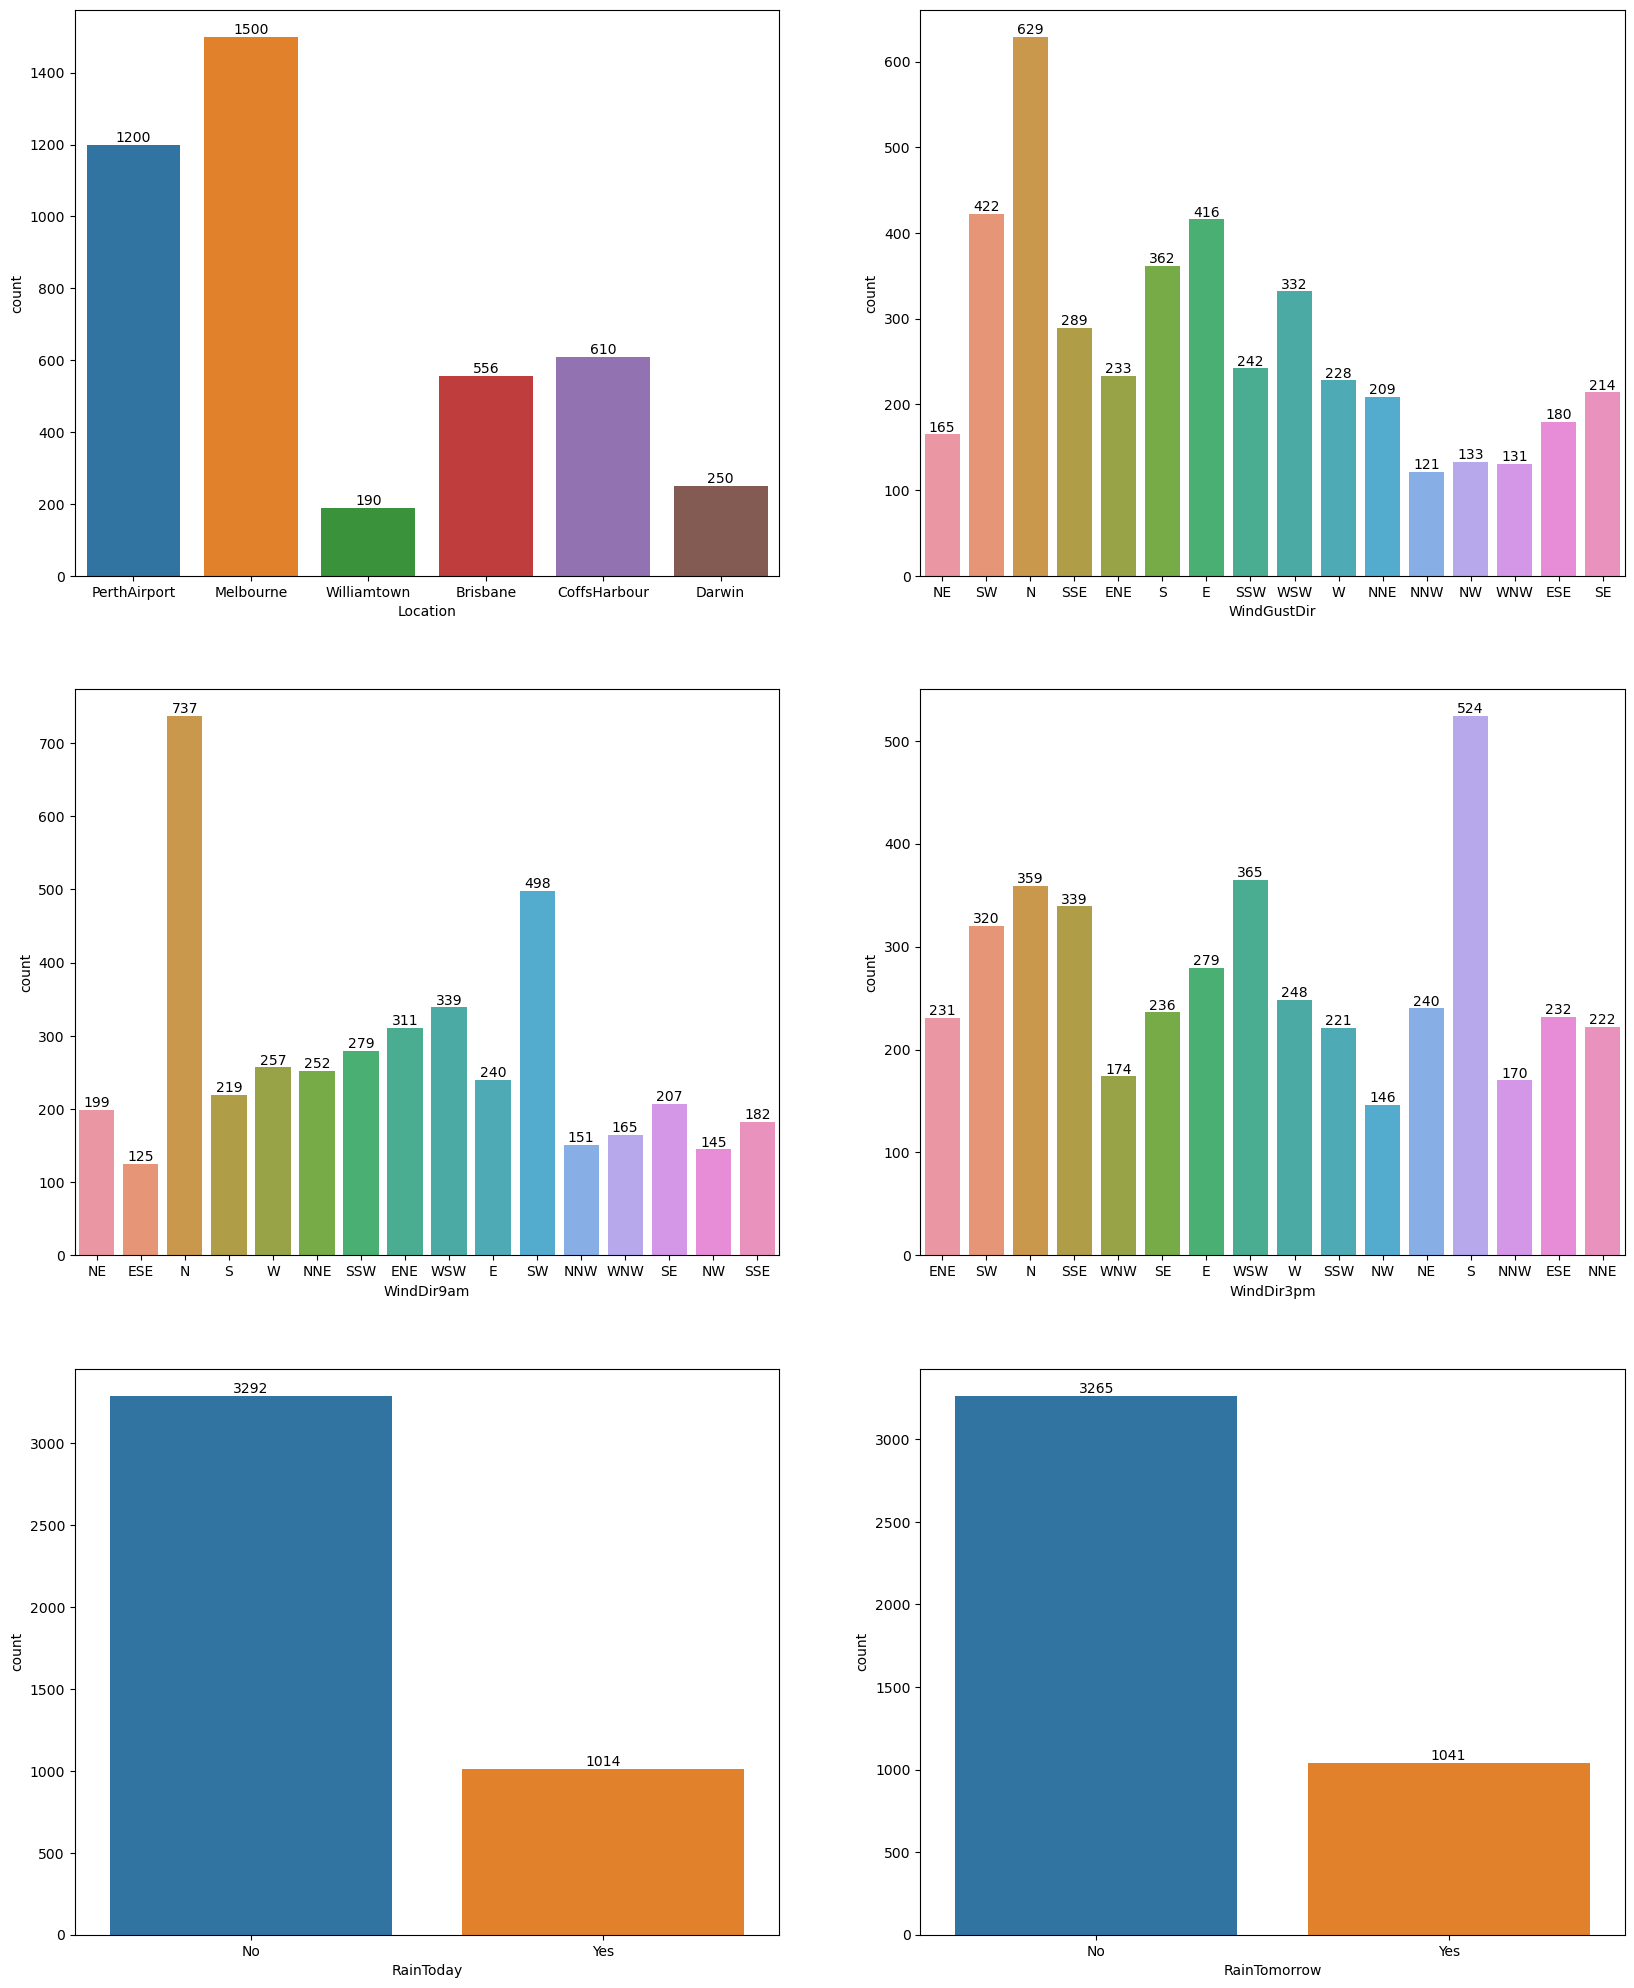

In [146]:
plt.figure(figsize =(20, 25))
plotnumber =1

for i in cat_cols:
    if plotnumber <=6:
        plt.subplot(3, 2, plotnumber)
        ax =sns.countplot(x =i, data =df)
        ax.bar_label(ax.containers[0])
        plt.xlabel(i)
    plotnumber+=1
plt.show()

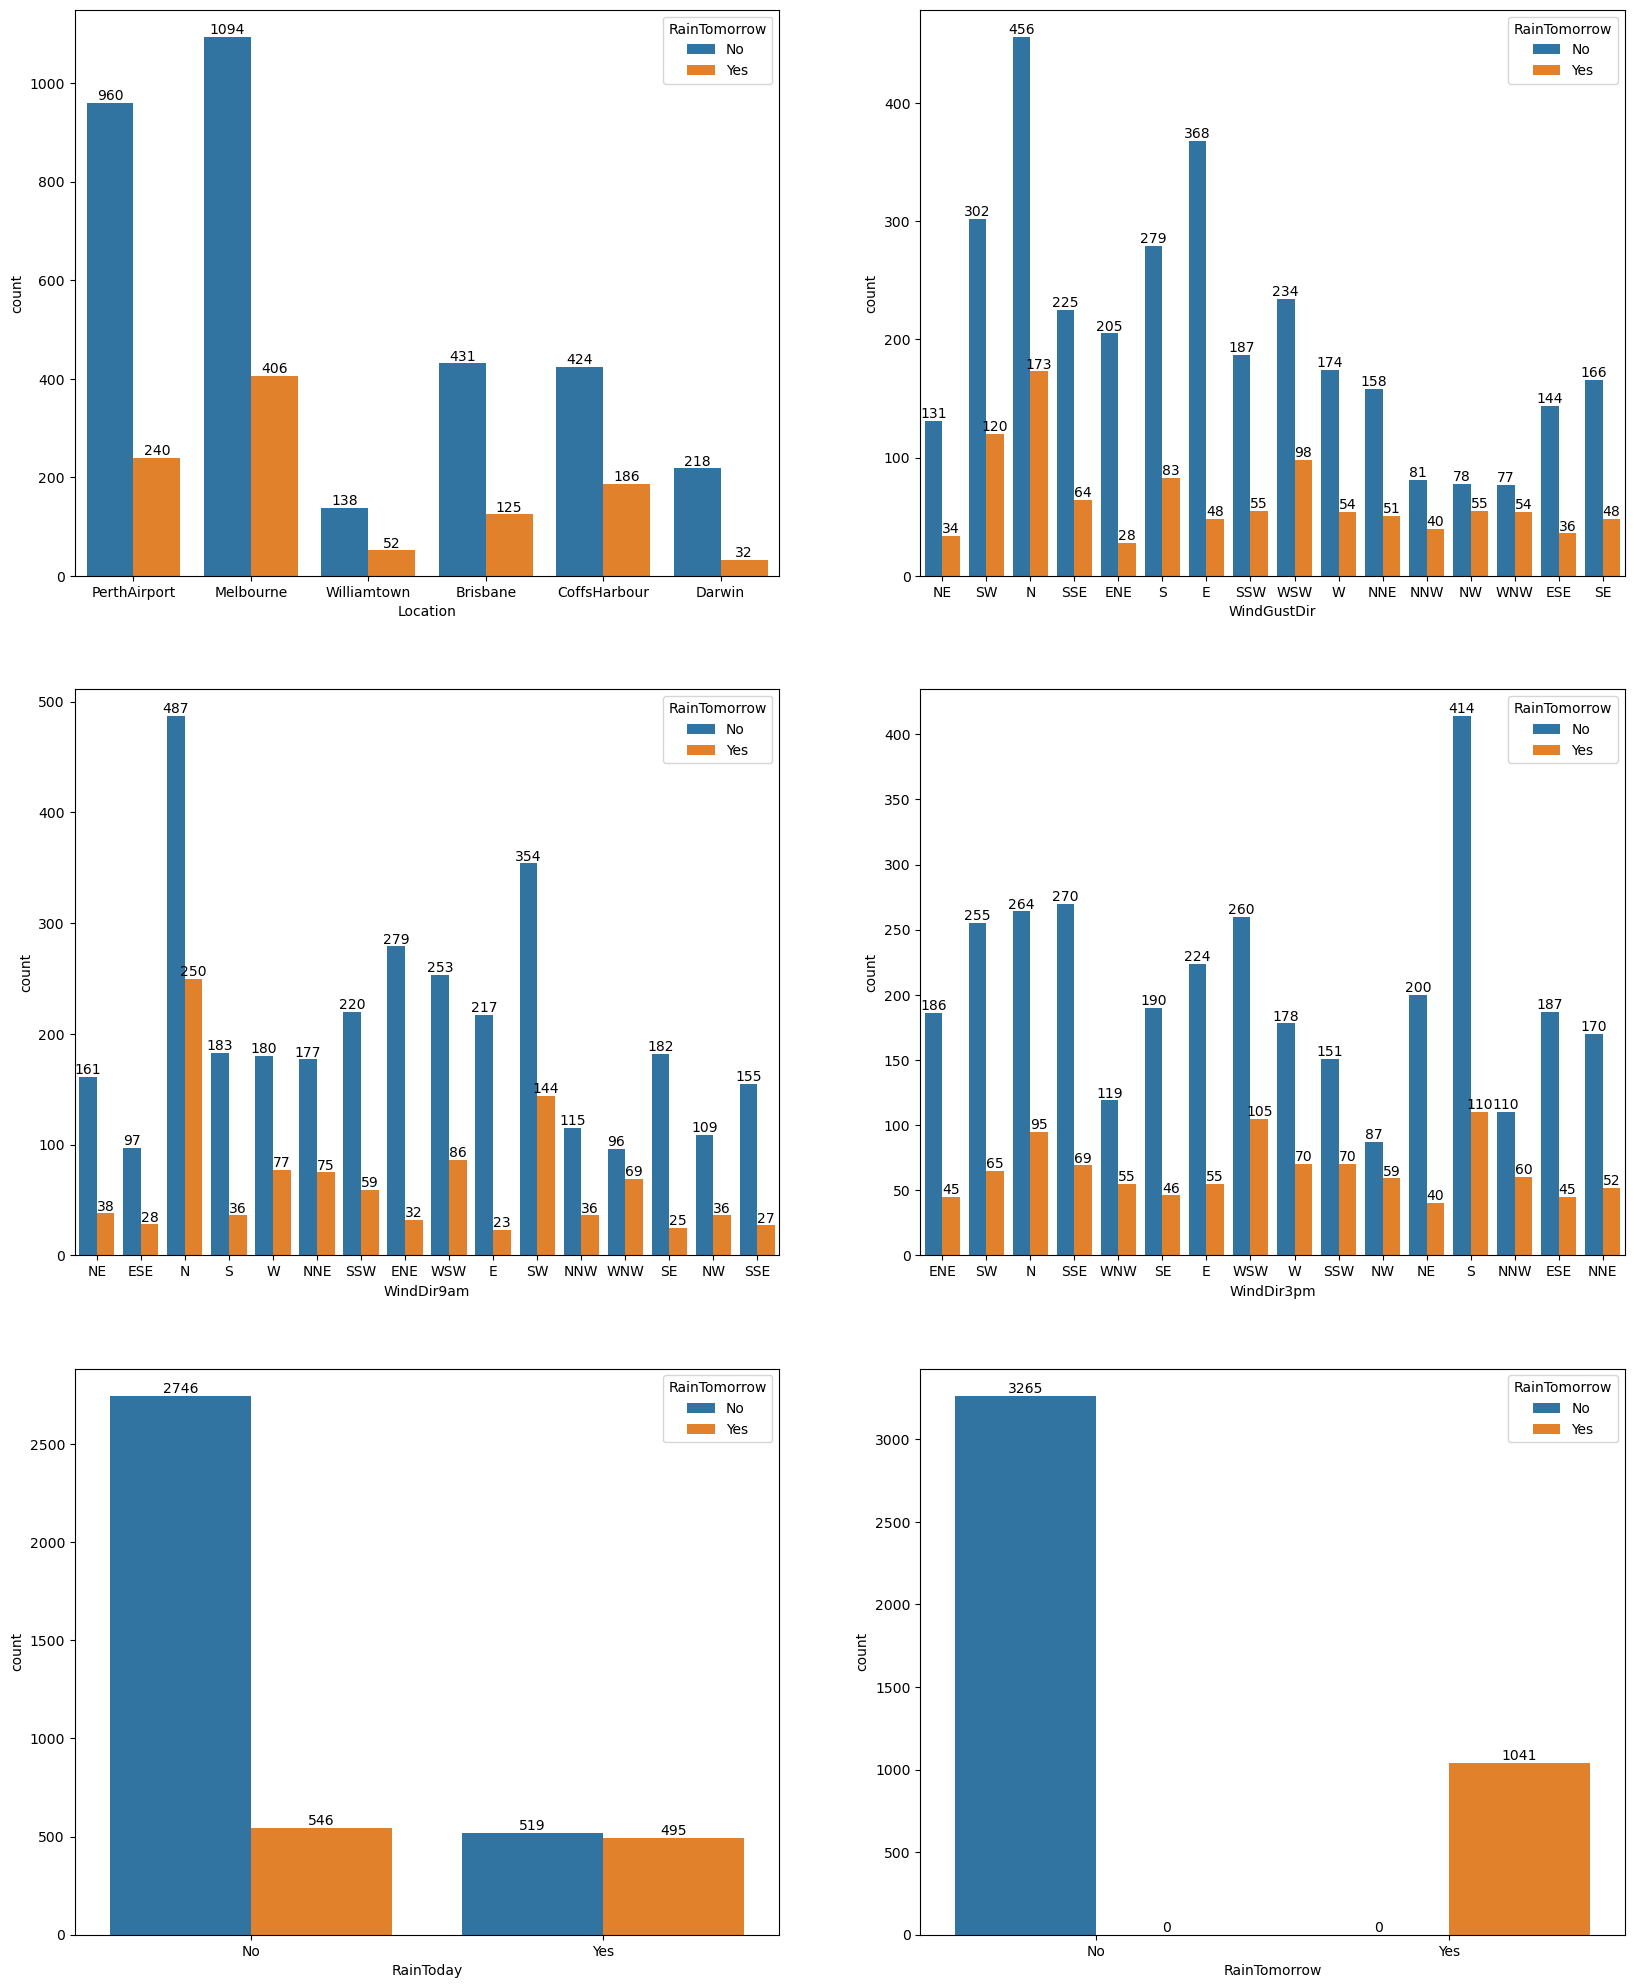

In [147]:
plt.figure(figsize =(20, 25))
plotnumber =1

for i in cat_cols:
    if plotnumber <=6:
        plt.subplot(3, 2, plotnumber)
        ax =sns.countplot(x =i, hue ='RainTomorrow', data =df)
        ax.bar_label(ax.containers[0])
        ax.bar_label(ax.containers[1])
        plt.xlabel(i)
    plotnumber+=1
plt.show()

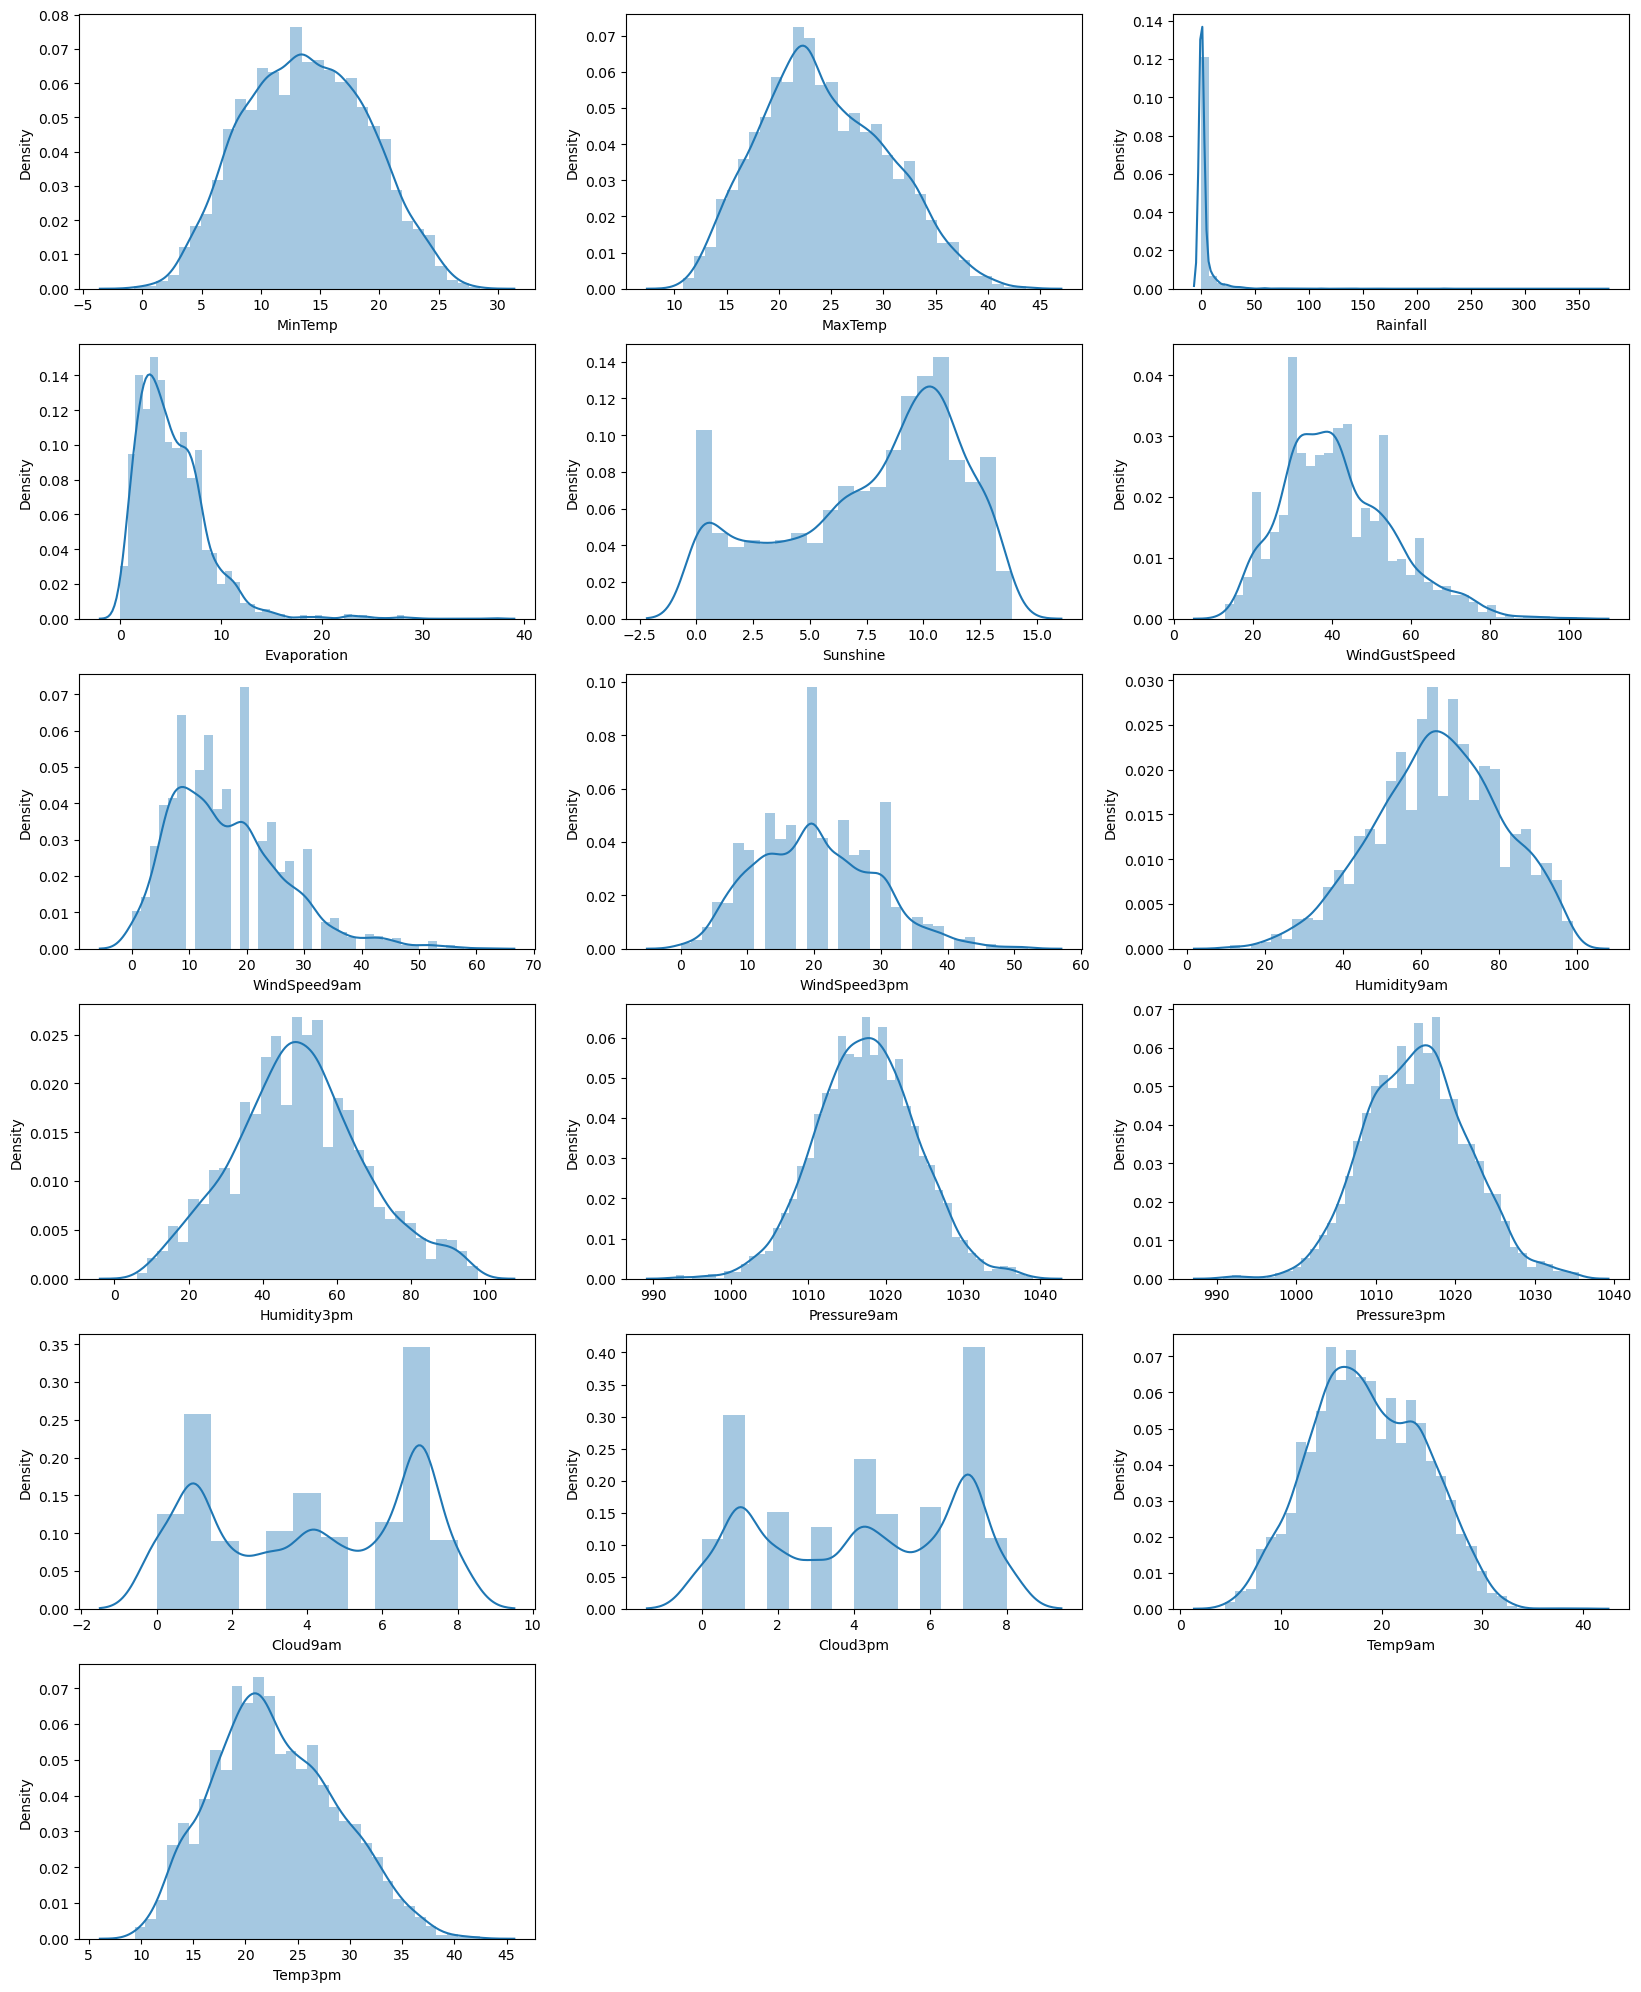

In [148]:
# Checking data distribution in numerical columns
plt.figure(figsize =(20, 25))
plotnumber =1

for i in num_cols:
    if plotnumber <= 16:
        plt.subplot(6, 3, plotnumber)
        sns.distplot(df[i])
        plt.xlabel(i)
    plotnumber+=1
plt.show()

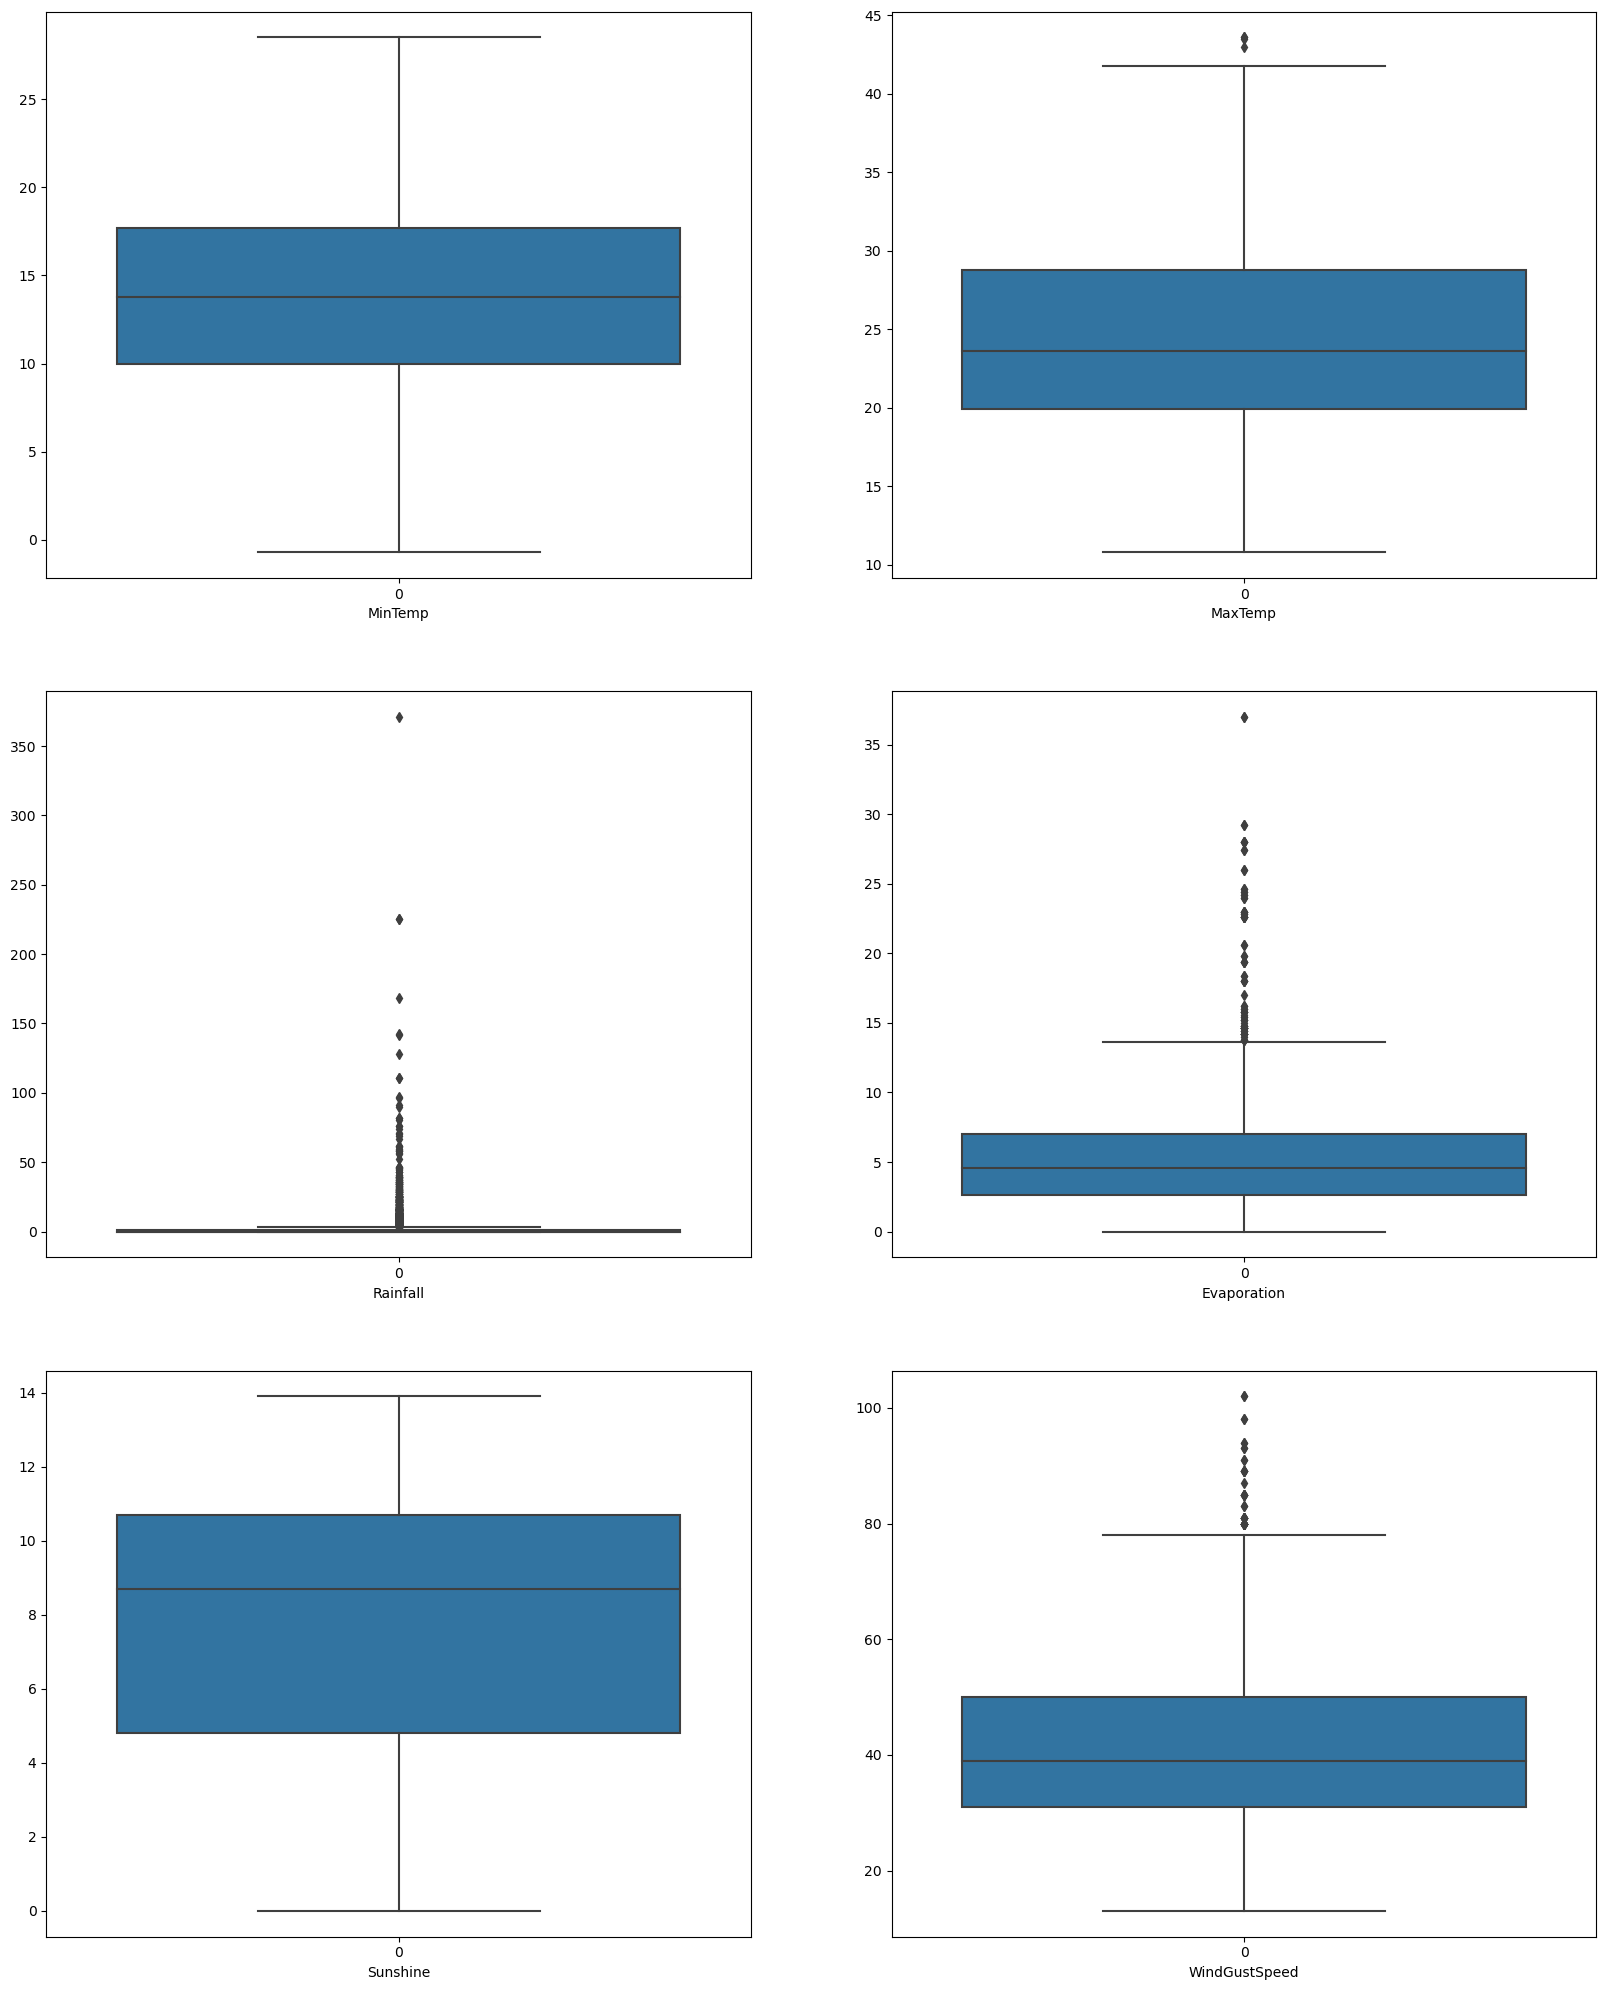

In [149]:
# Checking outliers using boxplot
plt.figure(figsize =(20, 25))
plotnumber =1

for i in num_cols:
    if plotnumber <= 6:
        plt.subplot(3, 2, plotnumber)
        sns.boxplot(df[i])
        plt.xlabel(i)
    plotnumber+=1
plt.show()

In [150]:
# Removing outliers using IQR method
df_iqr =df[['MaxTemp', 'Rainfall', 'Evaporation', 'WindGustSpeed']]

Q1 =df_iqr.quantile(0.25)
Q3 =df_iqr.quantile(0.55)

IQR =Q3-Q1

# For high side
for i in df_iqr:
    high =Q3[i] + (1.5 * IQR[i])
    high_index =np.where(df_iqr[i] > high)
    df_iqr =df_iqr.drop(df_iqr.index[high_index])

In [151]:
# Removing outlier using zscore
df_zscore =df[['MaxTemp', 'Rainfall', 'Evaporation', 'WindGustSpeed']]
z =np.abs(zscore(df_zscore))
df_zscore =df_zscore[(z < 3).all(axis=1)]
df_zscore.shape

(4183, 4)

In [152]:
# Calculating dataloss after removing outliers by IQR and zscore
print("Original shape of dataset :",df.shape[0])
print('\n')
print("Shape of dataset after using IQR method :", df_iqr.shape[0])
print("Data loss after using IQR method :", ((df.shape[0] - df_iqr.shape[0])/df.shape[0])*100)
print('\n')
print("Shape of dataset after using zscore method :", df_zscore.shape[0])
print("Data loss after using IQR method :", ((df.shape[0] - df_zscore.shape[0])/df.shape[0])*100)

Original shape of dataset : 4306


Shape of dataset after using IQR method : 1910
Data loss after using IQR method : 55.643288434742225


Shape of dataset after using IQR method : 4183
Data loss after using IQR method : 2.8564793311658154


__We will use zscore to remove outliers, as data loss is only 2.85%.__

In [153]:
# Removing outliers using zscore
df =df[(z < 3).all(axis =1)]
df.shape

(4183, 23)

In [154]:
# Resetting index
df.reset_index(drop =True, inplace =True)

In [155]:
# Checking skewness in the dataset
df[num_cols].skew()

MinTemp          0.071073
MaxTemp          0.271781
Rainfall         3.683245
Evaporation      0.780648
Sunshine        -0.562634
WindGustSpeed    0.543692
WindSpeed9am     0.874748
WindSpeed3pm     0.349412
Humidity9am     -0.206730
Humidity3pm      0.202563
Pressure9am      0.047884
Pressure3pm      0.090762
Cloud9am        -0.117027
Cloud3pm        -0.148775
Temp9am          0.079191
Temp3pm          0.281556
dtype: float64

In [156]:
df['Evaporation'] =np.cbrt(df['Evaporation'])
df['WindSpeed9am'] =np.cbrt(df['WindSpeed9am'])
df['Rainfall'] =np.cbrt(df['Rainfall'])
df['Rainfall'] =np.cbrt(df['Rainfall'])

In [157]:
# Checking skewness in the dataset
df[num_cols].skew()

MinTemp          0.071073
MaxTemp          0.271781
Rainfall         0.819039
Evaporation     -0.400243
Sunshine        -0.562634
WindGustSpeed    0.543692
WindSpeed9am    -0.989040
WindSpeed3pm     0.349412
Humidity9am     -0.206730
Humidity3pm      0.202563
Pressure9am      0.047884
Pressure3pm      0.090762
Cloud9am        -0.117027
Cloud3pm        -0.148775
Temp9am          0.079191
Temp3pm          0.281556
dtype: float64

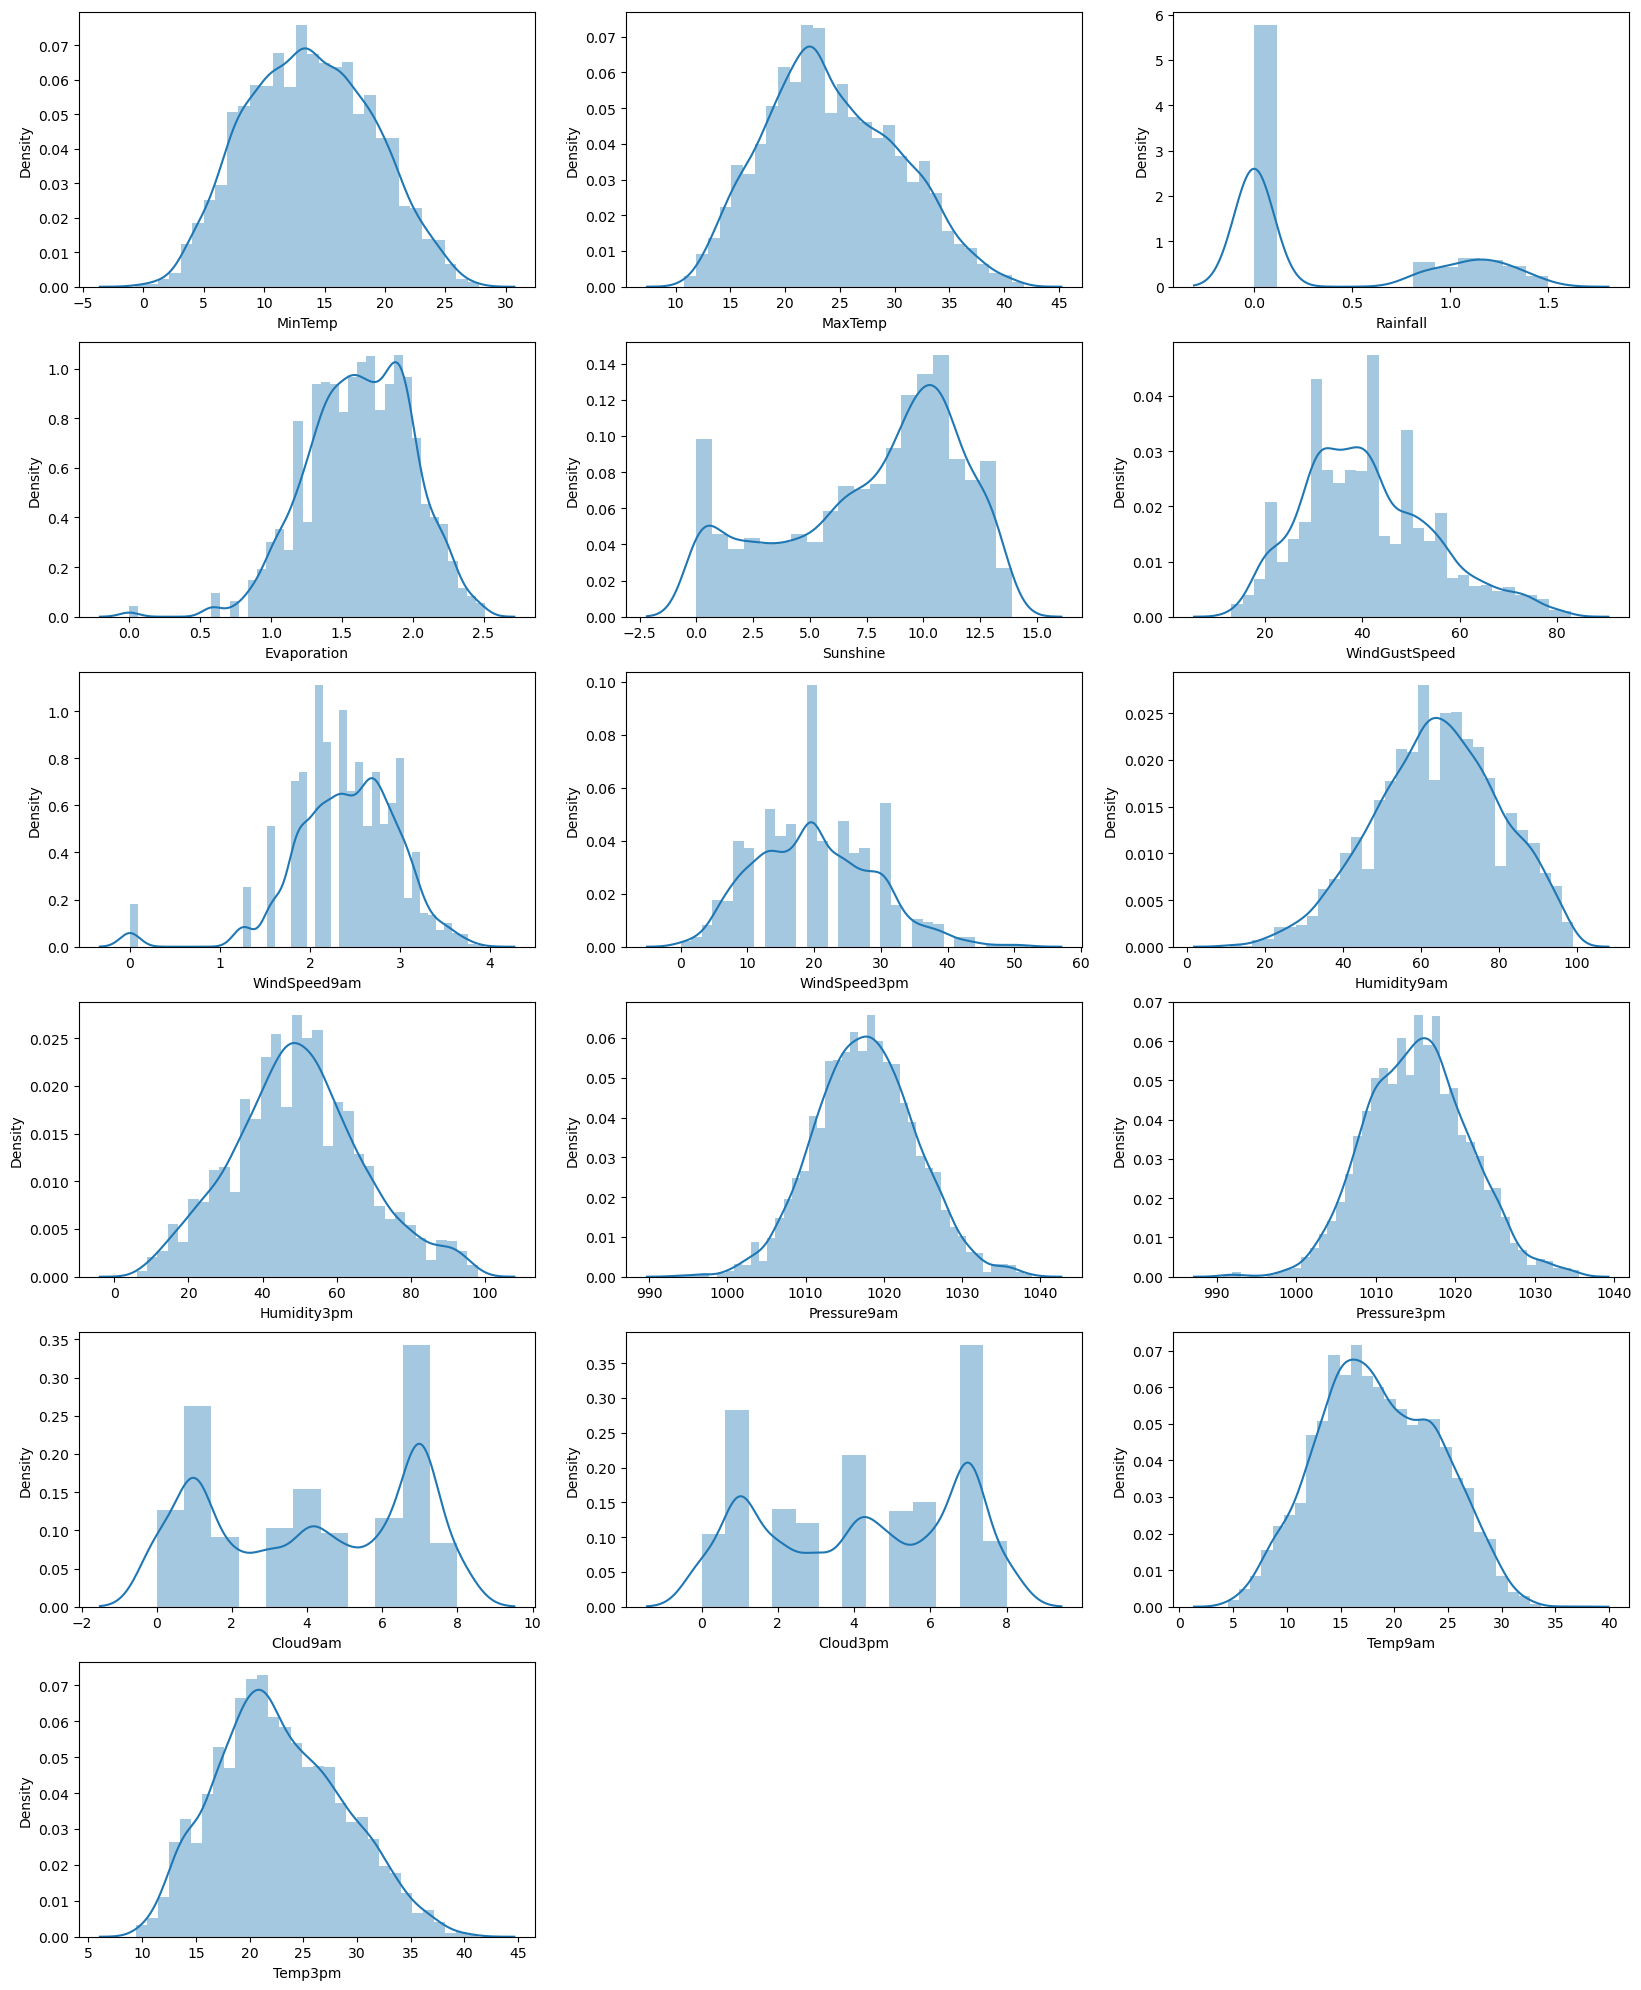

In [158]:
# Checking data distribution in numerical columns
plt.figure(figsize =(20, 25))
plotnumber =1

for i in num_cols:
    if plotnumber <= 16:
        plt.subplot(6, 3, plotnumber)
        sns.distplot(df[i])
        plt.xlabel(i)
    plotnumber+=1
plt.show()

In [159]:
# Encoding categorical column using OrdinalEncoder
OE =OrdinalEncoder()

for i in df.dtypes.index:
    if df[i].dtypes =='object':
        df[i] =OE.fit_transform(df[i].values.reshape(-1, 1))
        
df

Date  Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0    2012-06-04       4.0     15.6     21.7  0.000000     1.587401       0.9   
1    2014-02-07       4.0     19.5     31.5  0.000000     2.210419      12.7   
2    2010-04-19       3.0     16.1     27.6  0.000000     1.817121       6.6   
3    2010-09-22       3.0      9.8     16.6  0.000000     0.928318       1.2   
4    2011-07-07       3.0      6.4     11.5  1.102163     1.000000       4.9   
...         ...       ...      ...      ...       ...          ...       ...   
4178 2009-08-30       1.0     19.3     25.1  0.000000     1.613429       4.1   
4179 2010-01-29       3.0     17.5     23.5  0.000000     1.912931       7.5   
4180 2009-05-09       1.0     11.5     21.9  0.903201     1.473613      10.2   
4181 2012-05-11       2.0     22.9     32.0  0.000000     1.375069       9.3   
4182 2010-05-04       3.0     11.6     23.5  0.000000     1.912931       6.8   

      WindGustDir  WindGustSpeed  WindDir9am  ...  Humidity9am  Humidity3pm  \
0             4.0           41.0         4.0  ...         40.0         36.0   
1            12.0           48.0         2.0  ...         49.0         40.0   
2             3.0           46.0         3.0  ...         66.0         37.0   
3            10.0           33.0         8.0  ...         64.0         53.0   
4            12.0           46.0        13.0  ...         75.0         56.0   
...           ...            ...         ...  ...          ...          ...   
4178         13.0           43.0        13.0  ...         32.0         38.0   
4179         10.0           48.0         8.0  ...         70.0         45.0   
4180         12.0           35.0        15.0  ...         63.0         50.0   
4181          2.0           39.0         0.0  ...         76.0         47.0   
4182          3.0           80.0         3.0  ...         43.0         37.0   

      Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
0          1019.3       1017.4       7.0       7.0     18.1     21.4   
1          1012.3       1009.3       0.0       0.0     24.7     29.0   
2          1023.8       1020.6       6.0       7.0     17.5     27.3   
3          1028.2       1026.4       7.0       7.0     12.9     14.7   
4          1015.3       1019.5       6.0       7.0      6.7     11.4   
...           ...          ...       ...       ...      ...      ...   
4178       1011.2       1010.5       5.0       5.0     23.2     21.7   
4179       1014.8       1015.9       7.0       2.0     18.9     21.6   
4180       1022.5       1018.7       2.0       1.0     18.5     21.3   
4181       1012.2       1009.2       5.0       6.0     26.2     31.2   
4182       1011.4       1006.5       6.0       7.0     19.9     22.9   

      RainToday  RainTomorrow  
0           0.0           0.0  
1           0.0           0.0  
2           0.0           0.0  
3           0.0           0.0  
4           1.0           0.0  
...         ...           ...  
4178        0.0           0.0  
4179        0.0           0.0  
4180        0.0           0.0  
4181        0.0           0.0  
4182        0.0           1.0  

[4183 rows x 23 columns]

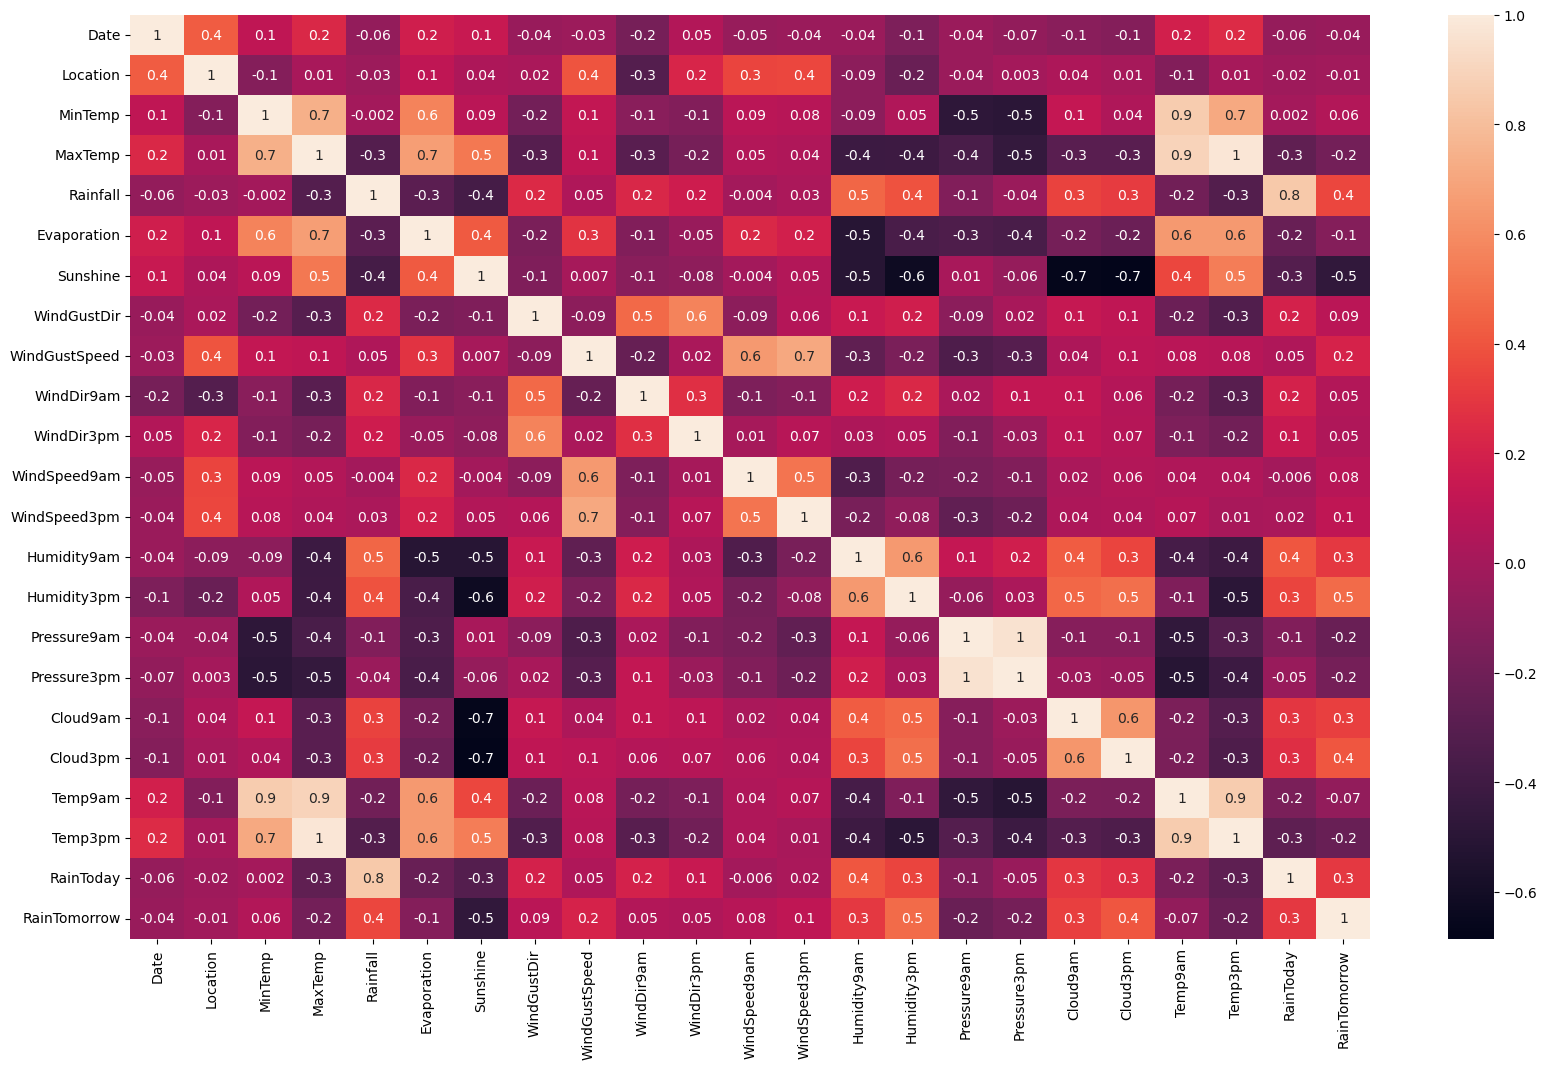

In [160]:
# Plotting heatmap
plt.figure(figsize =(20, 12))
sns.heatmap(df.corr(), annot =True, fmt ='.1g')
plt.show()

__As per the above heatmap, we found multicollinearity between.__
    1. MinTemp and Temp9am
    2. MaxTemp and Temp9am
    3. Temp9am and Temp3pm
    4. RainToday and Rainfall

__Plotting scatterplot to confirm multicollinearity.__

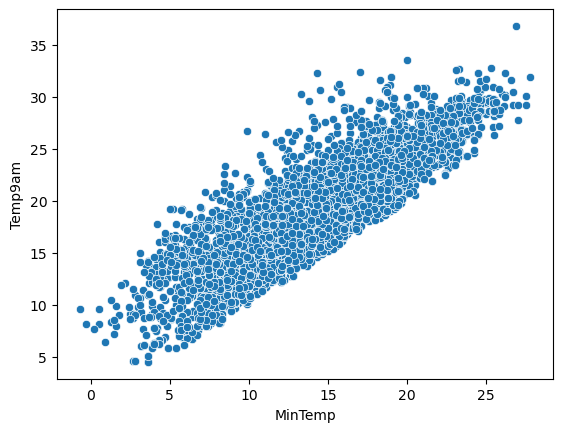

In [161]:
#MinTemp and Temp9am
sns.scatterplot(x ='MinTemp', y ='Temp9am', data =df)
plt.show()

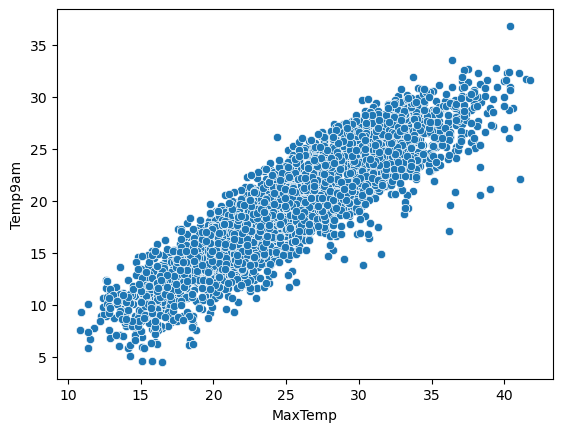

In [162]:
#MaxTemp and Temp9am
sns.scatterplot(x ='MaxTemp', y ='Temp9am', data =df)
plt.show()

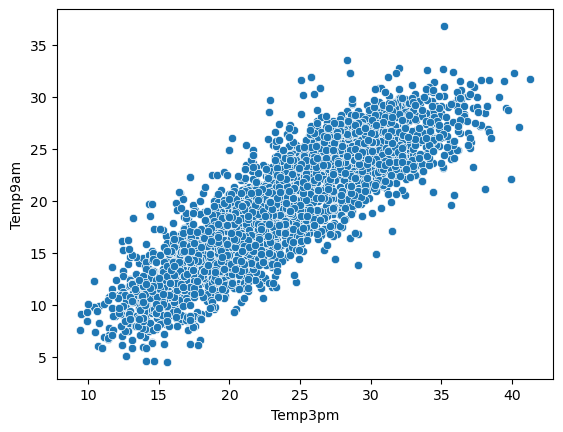

In [163]:
#Temp3pm and Temp9am
sns.scatterplot(x ='Temp3pm', y ='Temp9am', data =df)
plt.show()

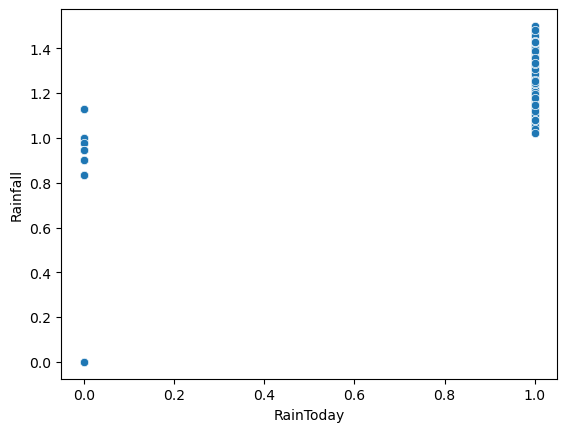

In [164]:
#RainToday and Rainfall
sns.scatterplot(x ='RainToday', y ='Rainfall', data =df)
plt.show()

__From the above scatter plot, multicollinearity is confirmed between__
    1. MinTemp and Temp9am
    2. MaxTemp and Temp9am
    3. Temp9am and Temp3pm

In [165]:
# Dropping Temp9am
df.drop(columns =['Temp9am'], inplace =True)

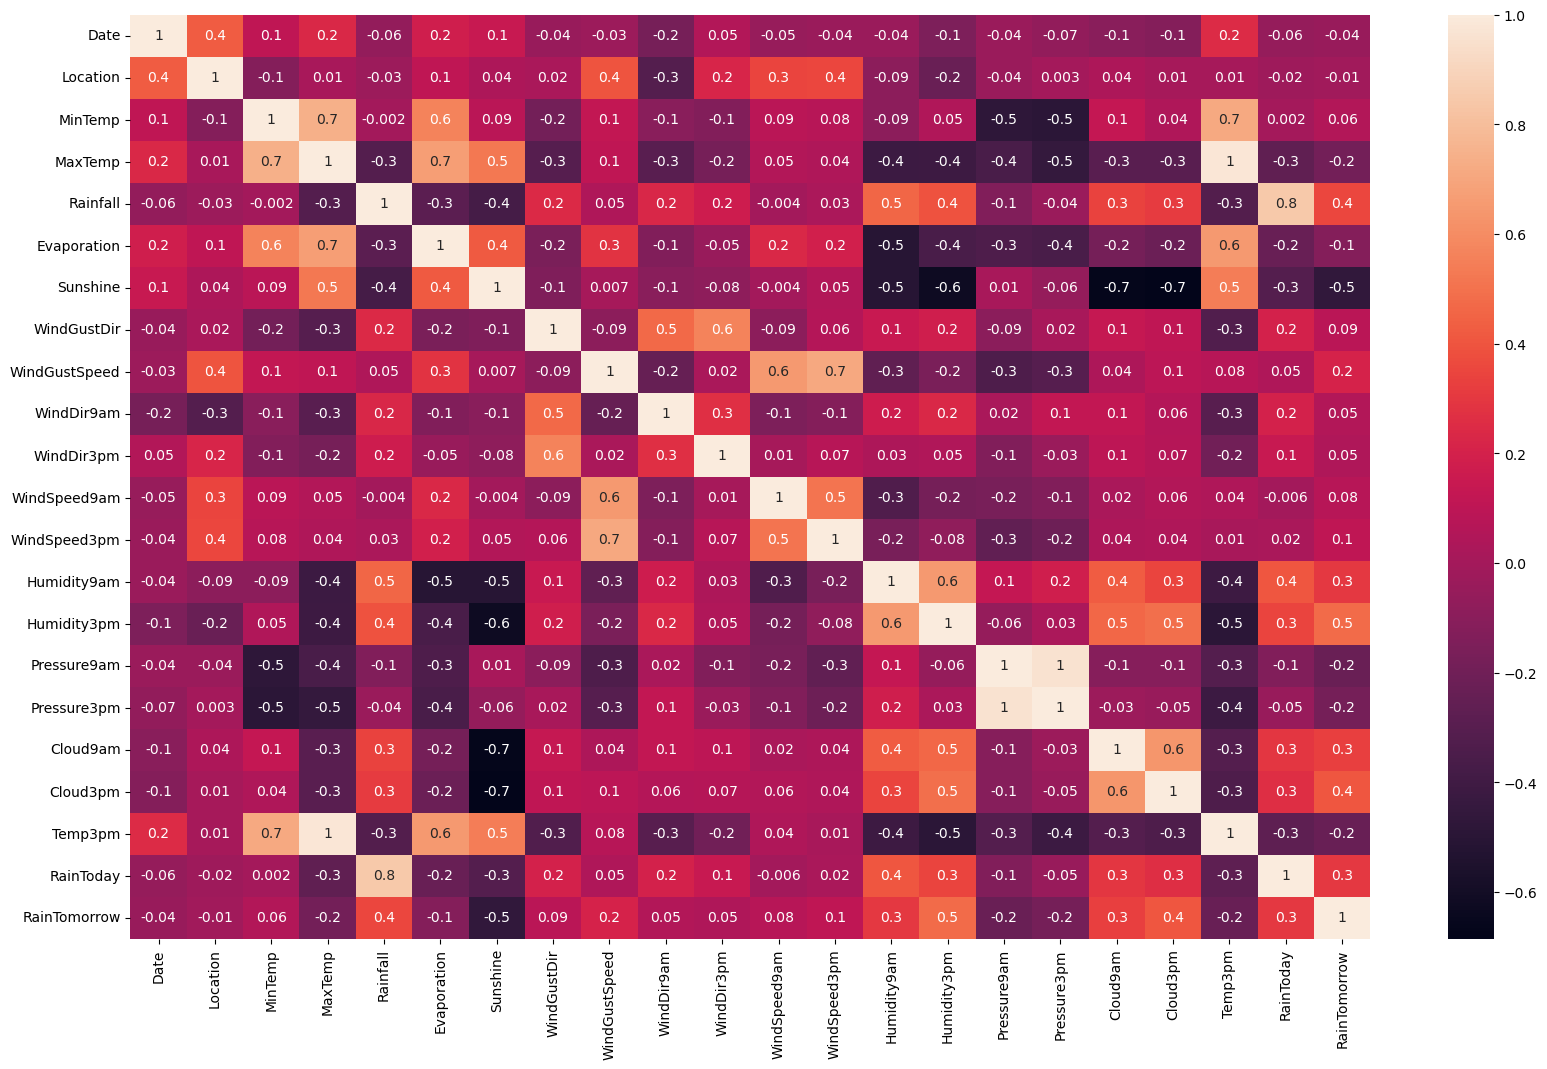

In [166]:
# Again Plotting heatmap
plt.figure(figsize =(20, 12))
sns.heatmap(df.corr(), annot =True, fmt ='.1g')
plt.show()

In [167]:
# Setting date column as index
df.set_index('Date', inplace =True)

In [168]:
# Seperating Features and label
x =df.drop(columns =['RainTomorrow'])
y =df[['RainTomorrow']]

In [169]:
# Standardizing data using StandardScaler
scaler =StandardScaler()
x =pd.DataFrame(scaler.fit_transform(x), columns =x.columns)
x

Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
0     0.958144  0.353664 -0.437128 -0.694897    -0.108278 -1.777018   
1     0.958144  1.111716  1.184420 -0.694897     1.589403  1.287101   
2     0.264973  0.450850  0.539110 -0.694897     0.517692 -0.296893   
3     0.264973 -0.773696 -1.280995 -0.694897    -1.904235 -1.699117   
4     0.264973 -1.434563 -2.124862  1.341739    -1.708906 -0.738334   
...        ...       ...       ...       ...          ...       ...   
4178 -1.121370  1.072842  0.125450 -0.694897    -0.037355 -0.946071   
4179  0.264973  0.722971 -0.139293 -0.694897     0.778769 -0.063189   
4180 -1.121370 -0.443263 -0.404036  0.974087    -0.418344  0.637923   
4181 -0.428198  1.772583  1.267152 -0.694897    -0.686869  0.404219   
4182  0.264973 -0.423826 -0.139293 -0.694897     0.778769 -0.244959   

      WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  \
0       -0.670304      -0.006837   -0.712191   -1.452483      0.662696   
1        0.995575       0.510728   -1.130046    0.935437      0.094325   
2       -0.878539       0.362852   -0.921119   -1.018316      0.272150   
3        0.579105      -0.598340    0.123518    0.501270     -0.100100   
4        0.995575       0.362852    1.168156    0.935437      0.934261   
...           ...            ...         ...         ...           ...   
4178     1.203810       0.141039    1.168156   -1.235400      1.179220   
4179     0.579105       0.510728    0.123518    0.067102      0.802255   
4180     0.995575      -0.450464    1.586011    0.067102      0.272150   
4181    -1.086774      -0.154713   -1.547901   -1.669567      0.514400   
4182    -0.878539       2.876739   -0.921119   -0.367065      2.395466   

      WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
0         0.213274    -1.491521    -0.785479     0.251253     0.332336   
1         1.673645    -0.935164    -0.556736    -0.819395    -0.917218   
2         0.887291     0.115732    -0.728293     0.939527     0.825987   
3        -0.123735    -0.007903     0.186679     1.612505     1.720730   
4         1.111963     0.672089     0.358237    -0.360546     0.656295   
...            ...          ...          ...          ...          ...   
4178     -1.808778    -1.986061    -0.671107    -0.987640    -0.732099   
4179      1.111963     0.363002    -0.270807    -0.437021     0.100937   
4180     -0.011399    -0.069720     0.015122     0.740692     0.532882   
4181     -0.123735     0.733907    -0.156435    -0.834690    -0.932645   
4182      1.111963    -1.306069    -0.728293    -0.957050    -1.349163   

      Cloud9am  Cloud3pm   Temp3pm  RainToday  
0     1.089419  1.106419 -0.243131  -0.541705  
1    -1.530510 -1.650266  1.046204  -0.541705  
2     0.715143  1.106419  0.757800  -0.541705  
3     1.089419  1.106419 -1.379781  -0.541705  
4     0.715143  1.106419 -1.939624   1.846022  
...        ...       ...       ...        ...  
4178  0.340868  0.318795 -0.192236  -0.541705  
4179  1.089419 -0.862642 -0.209201  -0.541705  
4180 -0.781959 -1.256454 -0.260096  -0.541705  
4181  0.340868  0.712607  1.419432  -0.541705  
4182  0.715143  1.106419  0.011343  -0.541705  

[4183 rows x 20 columns]

In [170]:
# Checking variance inflaction factor
vif =pd.DataFrame()
vif['VIF Score'] =[variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif['Features'] =x.columns
vif

VIF Score       Features
0    1.742442       Location
1    6.102967        MinTemp
2   32.633499        MaxTemp
3    3.971373       Rainfall
4    2.501815    Evaporation
5    3.552633       Sunshine
6    1.905410    WindGustDir
7    3.119785  WindGustSpeed
8    1.737492     WindDir9am
9    1.657330     WindDir3pm
10   2.006551   WindSpeed9am
11   2.208506   WindSpeed3pm
12   2.814600    Humidity9am
13   4.045048    Humidity3pm
14  23.263701    Pressure9am
15  22.319029    Pressure3pm
16   2.364974       Cloud9am
17   2.268266       Cloud3pm
18  37.743354        Temp3pm
19   3.525978      RainToday

In [171]:
# Deleting columns having vif score more than 10
x.drop(columns =['MaxTemp', 'Pressure9am', 'Pressure3pm', 'Temp3pm'], inplace =True)

In [172]:
x

Location   MinTemp  Rainfall  Evaporation  Sunshine  WindGustDir  \
0     0.958144  0.353664 -0.694897    -0.108278 -1.777018    -0.670304   
1     0.958144  1.111716 -0.694897     1.589403  1.287101     0.995575   
2     0.264973  0.450850 -0.694897     0.517692 -0.296893    -0.878539   
3     0.264973 -0.773696 -0.694897    -1.904235 -1.699117     0.579105   
4     0.264973 -1.434563  1.341739    -1.708906 -0.738334     0.995575   
...        ...       ...       ...          ...       ...          ...   
4178 -1.121370  1.072842 -0.694897    -0.037355 -0.946071     1.203810   
4179  0.264973  0.722971 -0.694897     0.778769 -0.063189     0.579105   
4180 -1.121370 -0.443263  0.974087    -0.418344  0.637923     0.995575   
4181 -0.428198  1.772583 -0.694897    -0.686869  0.404219    -1.086774   
4182  0.264973 -0.423826 -0.694897     0.778769 -0.244959    -0.878539   

      WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  \
0         -0.006837   -0.712191   -1.452483      0.662696      0.213274   
1          0.510728   -1.130046    0.935437      0.094325      1.673645   
2          0.362852   -0.921119   -1.018316      0.272150      0.887291   
3         -0.598340    0.123518    0.501270     -0.100100     -0.123735   
4          0.362852    1.168156    0.935437      0.934261      1.111963   
...             ...         ...         ...           ...           ...   
4178       0.141039    1.168156   -1.235400      1.179220     -1.808778   
4179       0.510728    0.123518    0.067102      0.802255      1.111963   
4180      -0.450464    1.586011    0.067102      0.272150     -0.011399   
4181      -0.154713   -1.547901   -1.669567      0.514400     -0.123735   
4182       2.876739   -0.921119   -0.367065      2.395466      1.111963   

      Humidity9am  Humidity3pm  Cloud9am  Cloud3pm  RainToday  
0       -1.491521    -0.785479  1.089419  1.106419  -0.541705  
1       -0.935164    -0.556736 -1.530510 -1.650266  -0.541705  
2        0.115732    -0.728293  0.715143  1.106419  -0.541705  
3       -0.007903     0.186679  1.089419  1.106419  -0.541705  
4        0.672089     0.358237  0.715143  1.106419   1.846022  
...           ...          ...       ...       ...        ...  
4178    -1.986061    -0.671107  0.340868  0.318795  -0.541705  
4179     0.363002    -0.270807  1.089419 -0.862642  -0.541705  
4180    -0.069720     0.015122 -0.781959 -1.256454  -0.541705  
4181     0.733907    -0.156435  0.340868  0.712607  -0.541705  
4182    -1.306069    -0.728293  0.715143  1.106419  -0.541705  

[4183 rows x 16 columns]

# EDA Completed

## Model Building

### Finding Best Random State

In [173]:
maxrs =0
maxacc =0

for i in range(1, 200):
    x_train, x_test, y_train, y_test =train_test_split(x, y, test_size =0.3, random_state =i)
    RFC =RandomForestClassifier()
    RFC.fit(x_train, y_train)
    pred =RFC.predict(x_test)
    acc =accuracy_score(y_test, pred)
    
    if acc > maxacc:
        maxacc =acc
        maxrs =i
        
print("Maximum accuracy is :", maxacc, "at random state :",maxrs)

Maximum accuracy is : 0.9171314741035856 at random state : 39


In [174]:
x_train, x_test, y_train, y_test =train_test_split(x, y, test_size =0.3, random_state =maxrs)

In [175]:
# Initializing models
RFC =RandomForestClassifier()
ETC =ExtraTreesClassifier()
svc =SVC()
GBC =GradientBoostingClassifier()
ABC =AdaBoostClassifier()
BC =BaggingClassifier()
DTC =DecisionTreeClassifier()


In [180]:
# Building models

models ={'RandomForestClassfier' :RFC,
        'ExtraTreesClassifier ': ETC,
        'SVC ': svc,
        'GradientBoostingClassifier ': GBC,
        "AdaBoostClassifier ": ABC,
        'BaggingClassifier ': BC,
        'DecisionTreeClassifier ': DTC}

for name, model in models.items():
    model.fit(x_train, y_train)
    pred =model.predict(x_test)
    acc =accuracy_score(y_test, pred)
    
    print("Model Name ", name)
    print("*"*35)
    print("Accuracy of the model is :", acc*100)
    print("Confusion Matrix :\n", confusion_matrix(y_test, pred))
    print("Classification Report :\n", classification_report(y_test, pred))
    
    print('\n')
    print("Cross Validation for the model :", name)
    print("*"*30)
    score =cross_val_score(model, x, y, cv=5)
    print(score)
    print(score.mean())
    print("Difference between accuracy of the model and cross validation is :", (acc -(score.mean()))*100)
    print("="*80)
    print('\n')
    


Model Name  RandomForesClassfier
***********************************
Accuracy of the model is : 91.31474103585657
Confusion Matrix :
 [[952  32]
 [ 77 194]]
Classification Report :
               precision    recall  f1-score   support

         0.0       0.93      0.97      0.95       984
         1.0       0.86      0.72      0.78       271

    accuracy                           0.91      1255
   macro avg       0.89      0.84      0.86      1255
weighted avg       0.91      0.91      0.91      1255



Cross Validation for the model : RandomForesClassfier
******************************
[0.89605735 0.90681004 0.90203106 0.9138756  0.90430622]
0.9046160530031498
Difference between accuracy of the model and cross validation is : 0.8531357355415881


Model Name  ExtraTreesClassifier 
***********************************
Accuracy of the model is : 91.39442231075698
Confusion Matrix :
 [[956  28]
 [ 80 191]]
Classification Report :
               precision    recall  f1-score   support

  

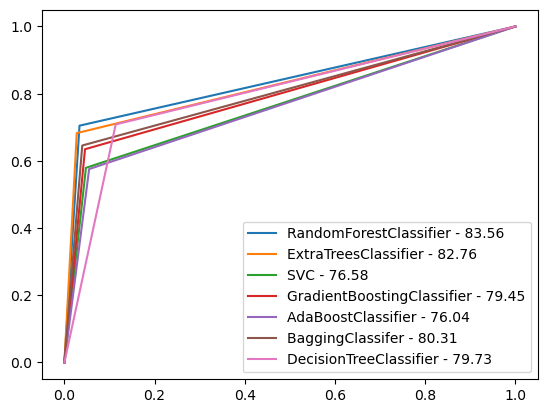

In [186]:
# Plotting ROC AUC score

models ={'RandomForestClassifier': RFC,
        'ExtraTreesClassifier' :ETC,
        'SVC' :svc,
        'GradientBoostingClassifier' :GBC,
        'AdaBoostClassifier' :ABC,
        'BaggingClassifer' :BC,
        'DecisionTreeClassifier' :DTC}

for name, model in models.items():
    model.fit(x_train, y_train)
    pred =model.predict(x_test)
    acc =accuracy_score(y_test, pred)
    fpr, tpr, _=metrics.roc_curve(y_test, pred)
    auc =round((metrics.roc_auc_score(y_test, pred))*100, 2)
    plt.plot(fpr, tpr, label =name +" - "+ str(auc))
plt.legend()

__RandomForestClassifier is our best model with auc score of 83.56% and accuracy of 91.31%.__

# Hyperparameter Tunning

In [187]:
parameters ={'n_estimators': [25, 50, 100, 150], 
            'max_features': ['sqrt', 'log2', None], 
            'max_depth': [3, 6, 9, None], 
            'max_leaf_nodes': [3, 6, 9, None]
            }

In [189]:
GCV =GridSearchCV(RandomForestClassifier(), parameters, cv =5)
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 6, 9, None],
                         'max_features': ['sqrt', 'log2', None],
                         'max_leaf_nodes': [3, 6, 9, None],
                         'n_estimators': [25, 50, 100, 150]})

In [190]:
GCV.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'n_estimators': 100}

In [199]:
Final_model =RandomForestClassifier(max_depth =None, max_features ='sqrt', max_leaf_nodes =None, n_estimators =100)
Final_model.fit(x_train, y_train)
pred =Final_model.predict(x_test)
acc =accuracy_score(y_test, pred)
print("Accuracy of the model is :", acc*100)

Accuracy of the model is : 90.99601593625498


__Accuracy does not increase after hyperparameter tunning. We will go with default parameters.__

In [202]:
Final_model =RandomForestClassifier()
Final_model.fit(x_train, y_train)
pred =Final_model.predict(x_test)
acc =accuracy_score(y_test, pred)
print("Accuracy of the model is :", acc*100)

Accuracy of the model is : 91.07569721115539


In [206]:
# Saving the model
pickle.dump(Final_model, open('RainTommorow_predict.pkl', 'wb'))

In [207]:
# Loading the model
loaded_model =pickle.load(open('RainTommorow_predict.pkl', 'rb'))
loaded_model.fit(x_train, y_train)
pred =loaded_model.predict(x_test)
acc =accuracy_score(y_test, pred)
print("Accuracy of the model is :", acc*100)

Accuracy of the model is : 91.39442231075698


In [209]:
# Comparing Actual Vs Predicted
act =np.array(y_test)
df1 =pd.DataFrame()
df1['Predicted'] =pred
df1['Actual'] =act
df1

Predicted  Actual
0           0.0     0.0
1           0.0     0.0
2           1.0     1.0
3           0.0     0.0
4           0.0     0.0
...         ...     ...
1250        0.0     0.0
1251        0.0     0.0
1252        0.0     0.0
1253        1.0     1.0
1254        0.0     0.0

[1255 rows x 2 columns]

# Predicting Rainfall (Regression Problem)

In [210]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import OrdinalEncoder
import pickle

import warnings
warnings.filterwarnings('ignore')

In [211]:
df =pd.read_csv(r'https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Rainfall%20Forecast/Rainfall.csv')
df =df.sample(frac =1)
df.head(10)

Date      Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
330   2009-10-27        Albury      5.9     24.1       0.0          NaN   
2625  2015-03-01       Penrith     18.4     37.4       0.0          NaN   
4628  2010-01-21     Melbourne     16.0     28.5       0.0          7.6   
1701  2013-12-09     Newcastle     16.9     35.5       0.0          NaN   
5671  2010-09-10     Melbourne      9.4     14.4       2.6          3.6   
3042  2016-05-27   Williamtown     12.0     19.0       0.6          3.4   
6027  2011-10-01     Melbourne      9.0     14.0       NaN          2.8   
2674  2015-04-19       Penrith     15.9     23.8       3.0          NaN   
6894  2014-11-21      Adelaide     14.5     27.1       6.6          1.8   
1031  2009-07-12  CoffsHarbour      6.4     20.2       0.0          1.0   

      Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
330        NaN         ENE           26.0          S  ...        64.0   
2625       NaN         SSE           69.0          N  ...        78.0   
4628       8.3           S           37.0        SSE  ...        61.0   
1701       NaN         NaN            NaN        NaN  ...        63.0   
5671       5.4          SW           52.0        WNW  ...        74.0   
3042       NaN          NW           74.0        WNW  ...        47.0   
6027       0.0         SSE           46.0          S  ...        83.0   
2674       NaN         SSW           39.0         SW  ...        51.0   
6894       NaN         SSW           24.0         NW  ...        57.0   
1031       9.7         NNE           30.0         NW  ...        76.0   

      Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
330          43.0       1027.5       1023.1       NaN       NaN     12.9   
2625         28.0          NaN          NaN       NaN       NaN     22.4   
4628         36.0       1011.8       1009.2       5.0       5.0     19.7   
1701         35.0          NaN          NaN       3.0       3.0     23.6   
5671         80.0       1002.1       1006.0       7.0       7.0     10.9   
3042         27.0       1005.1       1002.3       NaN       NaN     15.3   
6027         74.0       1008.4       1011.8       NaN       NaN     10.5   
2674         56.0          NaN          NaN       NaN       NaN     19.7   
6894         27.0       1013.5       1011.4       NaN       NaN     18.2   
1031         60.0       1017.1       1013.2       1.0       0.0     14.6   

      Temp3pm  RainToday  RainTomorrow  
330      23.4         No            No  
2625     35.6         No           Yes  
4628     27.9         No            No  
1701     34.0         No            No  
5671     11.8        Yes            No  
3042     18.1         No            No  
6027     13.5        NaN           NaN  
2674     20.6        Yes           Yes  
6894     25.5        Yes           Yes  
1031     18.6         No            No  

[10 rows x 23 columns]

In [212]:
df.shape

(8425, 23)

In [213]:
df.describe()

MinTemp      MaxTemp     Rainfall  Evaporation     Sunshine  \
count  8350.000000  8365.000000  8185.000000  4913.000000  4431.000000   
mean     13.193305    23.859976     2.805913     5.389395     7.632205   
std       5.403596     6.136408    10.459379     5.044484     3.896235   
min      -2.000000     8.200000     0.000000     0.000000     0.000000   
25%       9.200000    19.300000     0.000000     2.600000     4.750000   
50%      13.300000    23.300000     0.000000     4.600000     8.700000   
75%      17.400000    28.000000     1.000000     7.000000    10.700000   
max      28.500000    45.500000   371.000000   145.000000    13.900000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
count    7434.000000   8349.000000   8318.000000  8366.000000  8323.000000   
mean       40.174469     13.847646     18.533662    67.822496    51.249790   
std        14.665721     10.174579      9.766986    16.833283    18.423774   
min         7.000000      0.000000      0.000000    10.000000     6.000000   
25%        30.000000      6.000000     11.000000    56.000000    39.000000   
50%        39.000000     13.000000     19.000000    68.000000    51.000000   
75%        50.000000     20.000000     24.000000    80.000000    63.000000   
max       107.000000     63.000000     83.000000   100.000000    99.000000   

       Pressure9am  Pressure3pm     Cloud9am     Cloud3pm      Temp9am  \
count  7116.000000  7113.000000  6004.000000  5970.000000  8369.000000   
mean   1017.640233  1015.236075     4.566622     4.503183    17.762015   
std       6.828699     6.766681     2.877658     2.731659     5.627035   
min     989.800000   982.900000     0.000000     0.000000     1.900000   
25%    1013.000000  1010.400000     1.000000     2.000000    13.800000   
50%    1017.700000  1015.300000     5.000000     5.000000    17.800000   
75%    1022.300000  1019.800000     7.000000     7.000000    21.900000   
max    1039.000000  1036.000000     8.000000     8.000000    39.400000   

           Temp3pm  
count  8329.000000  
mean     22.442934  
std       5.980020  
min       7.300000  
25%      18.000000  
50%      21.900000  
75%      26.400000  
max      44.100000

In [214]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [ ]:
# __There are many null values present in the dataset. We will delete null values from the target column.__    

In [215]:
# Droping null values from the target variable
df.dropna(subset =['Rainfall'], inplace =True)

In [216]:
# Again checking null values
df.isnull().sum()

Date                0
Location            0
MinTemp            50
MaxTemp            45
Rainfall            0
Evaporation      3397
Sunshine         3880
WindGustDir       967
WindGustSpeed     967
WindDir9am        799
WindDir3pm        290
WindSpeed9am       50
WindSpeed3pm       89
Humidity9am        38
Humidity3pm        86
Pressure9am      1292
Pressure3pm      1295
Cloud9am         2231
Cloud3pm         2279
Temp9am            35
Temp3pm            80
RainToday           0
RainTomorrow      106
dtype: int64

__We will delete records where 40% value are null. As imputing 40% of data may create biasness in the dataset.__

In [217]:
df.dropna(subset =['Sunshine'], inplace =True)

In [218]:
# Again checking null values
df.isnull().sum()

Date               0
Location           0
MinTemp            2
MaxTemp            2
Rainfall           0
Evaporation       25
Sunshine           0
WindGustDir       70
WindGustSpeed     70
WindDir9am        71
WindDir3pm        17
WindSpeed9am       2
WindSpeed3pm       3
Humidity9am        3
Humidity3pm        6
Pressure9am        3
Pressure3pm        7
Cloud9am         254
Cloud3pm         287
Temp9am            3
Temp3pm            4
RainToday          0
RainTomorrow      65
dtype: int64

In [219]:
df.shape

(4305, 23)

In [220]:
# Imputing null values using Iterative Imputers
itr_impt =IterativeImputer()
for i in df:
    if df[i].dtypes !='object':
        df[i] =itr_impt.fit_transform(df[i].values.reshape(-1, 1))
    
df

Date      Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
4628  2010-01-21     Melbourne     16.0     28.5       0.0          7.6   
5671  2010-09-10     Melbourne      9.4     14.4       2.6          3.6   
1031  2009-07-12  CoffsHarbour      6.4     20.2       0.0          1.0   
5175  2011-08-21     Melbourne      6.1     21.4       0.0          2.2   
6710  2012-09-02      Brisbane      7.3     22.4       0.0          4.8   
...          ...           ...      ...      ...       ...          ...   
7194  2011-09-16  PerthAirport     13.9     20.8      19.2          2.0   
5533  2010-04-25     Melbourne     12.2     20.1       0.4          4.4   
4788  2010-06-30     Melbourne      6.8     12.8       1.8          1.8   
7380  2012-03-20  PerthAirport     13.8     27.7       0.0          8.6   
6572  2012-04-17      Brisbane     18.4     25.4       7.2          3.8   

      Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
4628       8.3           S           37.0        SSE  ...        61.0   
5671       5.4          SW           52.0        WNW  ...        74.0   
1031       9.7         NNE           30.0         NW  ...        76.0   
5175       9.6           N           30.0          N  ...        73.0   
6710      11.0           S           20.0         SW  ...        55.0   
...        ...         ...            ...        ...  ...         ...   
7194       5.6          NW           54.0          N  ...        86.0   
5533       6.8          SW           44.0          W  ...        70.0   
4788       2.7           N           59.0          N  ...        80.0   
7380      11.1         SSE           39.0          S  ...        51.0   
6572       4.6           E           26.0         SE  ...        92.0   

      Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
4628         36.0       1011.8       1009.2   5.00000  5.000000     19.7   
5671         80.0       1002.1       1006.0   7.00000  7.000000     10.9   
1031         60.0       1017.1       1013.2   1.00000  0.000000     14.6   
5175         35.0       1036.4       1034.4   4.15922  4.246142      9.3   
6710         36.0       1024.0       1019.8   0.00000  1.000000     14.8   
...           ...          ...          ...       ...       ...      ...   
7194         58.0       1015.5       1013.3   7.00000  5.000000     18.0   
5533         55.0       1017.4       1019.6   4.00000  6.000000     14.0   
4788         59.0       1016.9       1016.3   7.00000  7.000000      7.6   
7380         27.0       1018.9       1014.6   1.00000  1.000000     19.1   
6572         61.0       1018.2       1014.8   7.00000  3.000000     20.8   

      Temp3pm  RainToday  RainTomorrow  
4628     27.9         No            No  
5671     11.8        Yes            No  
1031     18.6         No            No  
5175     20.3         No            No  
6710     20.7         No            No  
...       ...        ...           ...  
7194     20.4        Yes           Yes  
5533     17.5         No            No  
4788     11.8        Yes            No  
7380     26.7         No            No  
6572     24.6        Yes            No  

[4305 rows x 23 columns]

In [221]:
# Again checking null values
df.isnull().sum()

Date              0
Location          0
MinTemp           0
MaxTemp           0
Rainfall          0
Evaporation       0
Sunshine          0
WindGustDir      70
WindGustSpeed     0
WindDir9am       71
WindDir3pm       17
WindSpeed9am      0
WindSpeed3pm      0
Humidity9am       0
Humidity3pm       0
Pressure9am       0
Pressure3pm       0
Cloud9am          0
Cloud3pm          0
Temp9am           0
Temp3pm           0
RainToday         0
RainTomorrow     65
dtype: int64

In [222]:
# Filling null values for object datatype
df['WindGustDir'] =df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])
df['WindDir9am'] =df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])
df['WindDir3pm'] =df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])
df['RainTomorrow'] =df['RainTomorrow'].fillna(df['RainTomorrow'].mode()[0])

In [223]:
# Again checking null values
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [224]:
df.shape

(4305, 23)

In [225]:
# Resetting index
df.reset_index(drop =True, inplace =True)

In [227]:
# Coverting date to datetype
df['Date'] =pd.to_datetime(df['Date'], format ='%Y-%m-%d')

In [228]:
# Checking datatype
df.dtypes

Date             datetime64[ns]
Location                 object
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
Evaporation             float64
Sunshine                float64
WindGustDir              object
WindGustSpeed           float64
WindDir9am               object
WindDir3pm               object
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Cloud9am                float64
Cloud3pm                float64
Temp9am                 float64
Temp3pm                 float64
RainToday                object
RainTomorrow             object
dtype: object

In [229]:
# Seperating Numerical and categorical columns

# Seperating numerical columns
num_cols =[]
for i in df.dtypes.index:
    if df[i].dtypes =='float64':
        num_cols.append(i)
        
# Seperating categorical columns
cat_cols =[]
for i in df.dtypes.index:
    if df[i].dtypes =='object':
        cat_cols.append(i)
        
print("Numerical Columns are :", num_cols)
print("Categorical Columns are :", cat_cols)

Numerical Columns are : ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
Categorical Columns are : ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [230]:
print("No of Numerical columns are :",len(num_cols))
print("No of Categorical columns are :",len(cat_cols))

No of Numerical columns are : 16
No of Categorical columns are : 6


## Univariate Analysis

### Checking data distribution for categorical columns

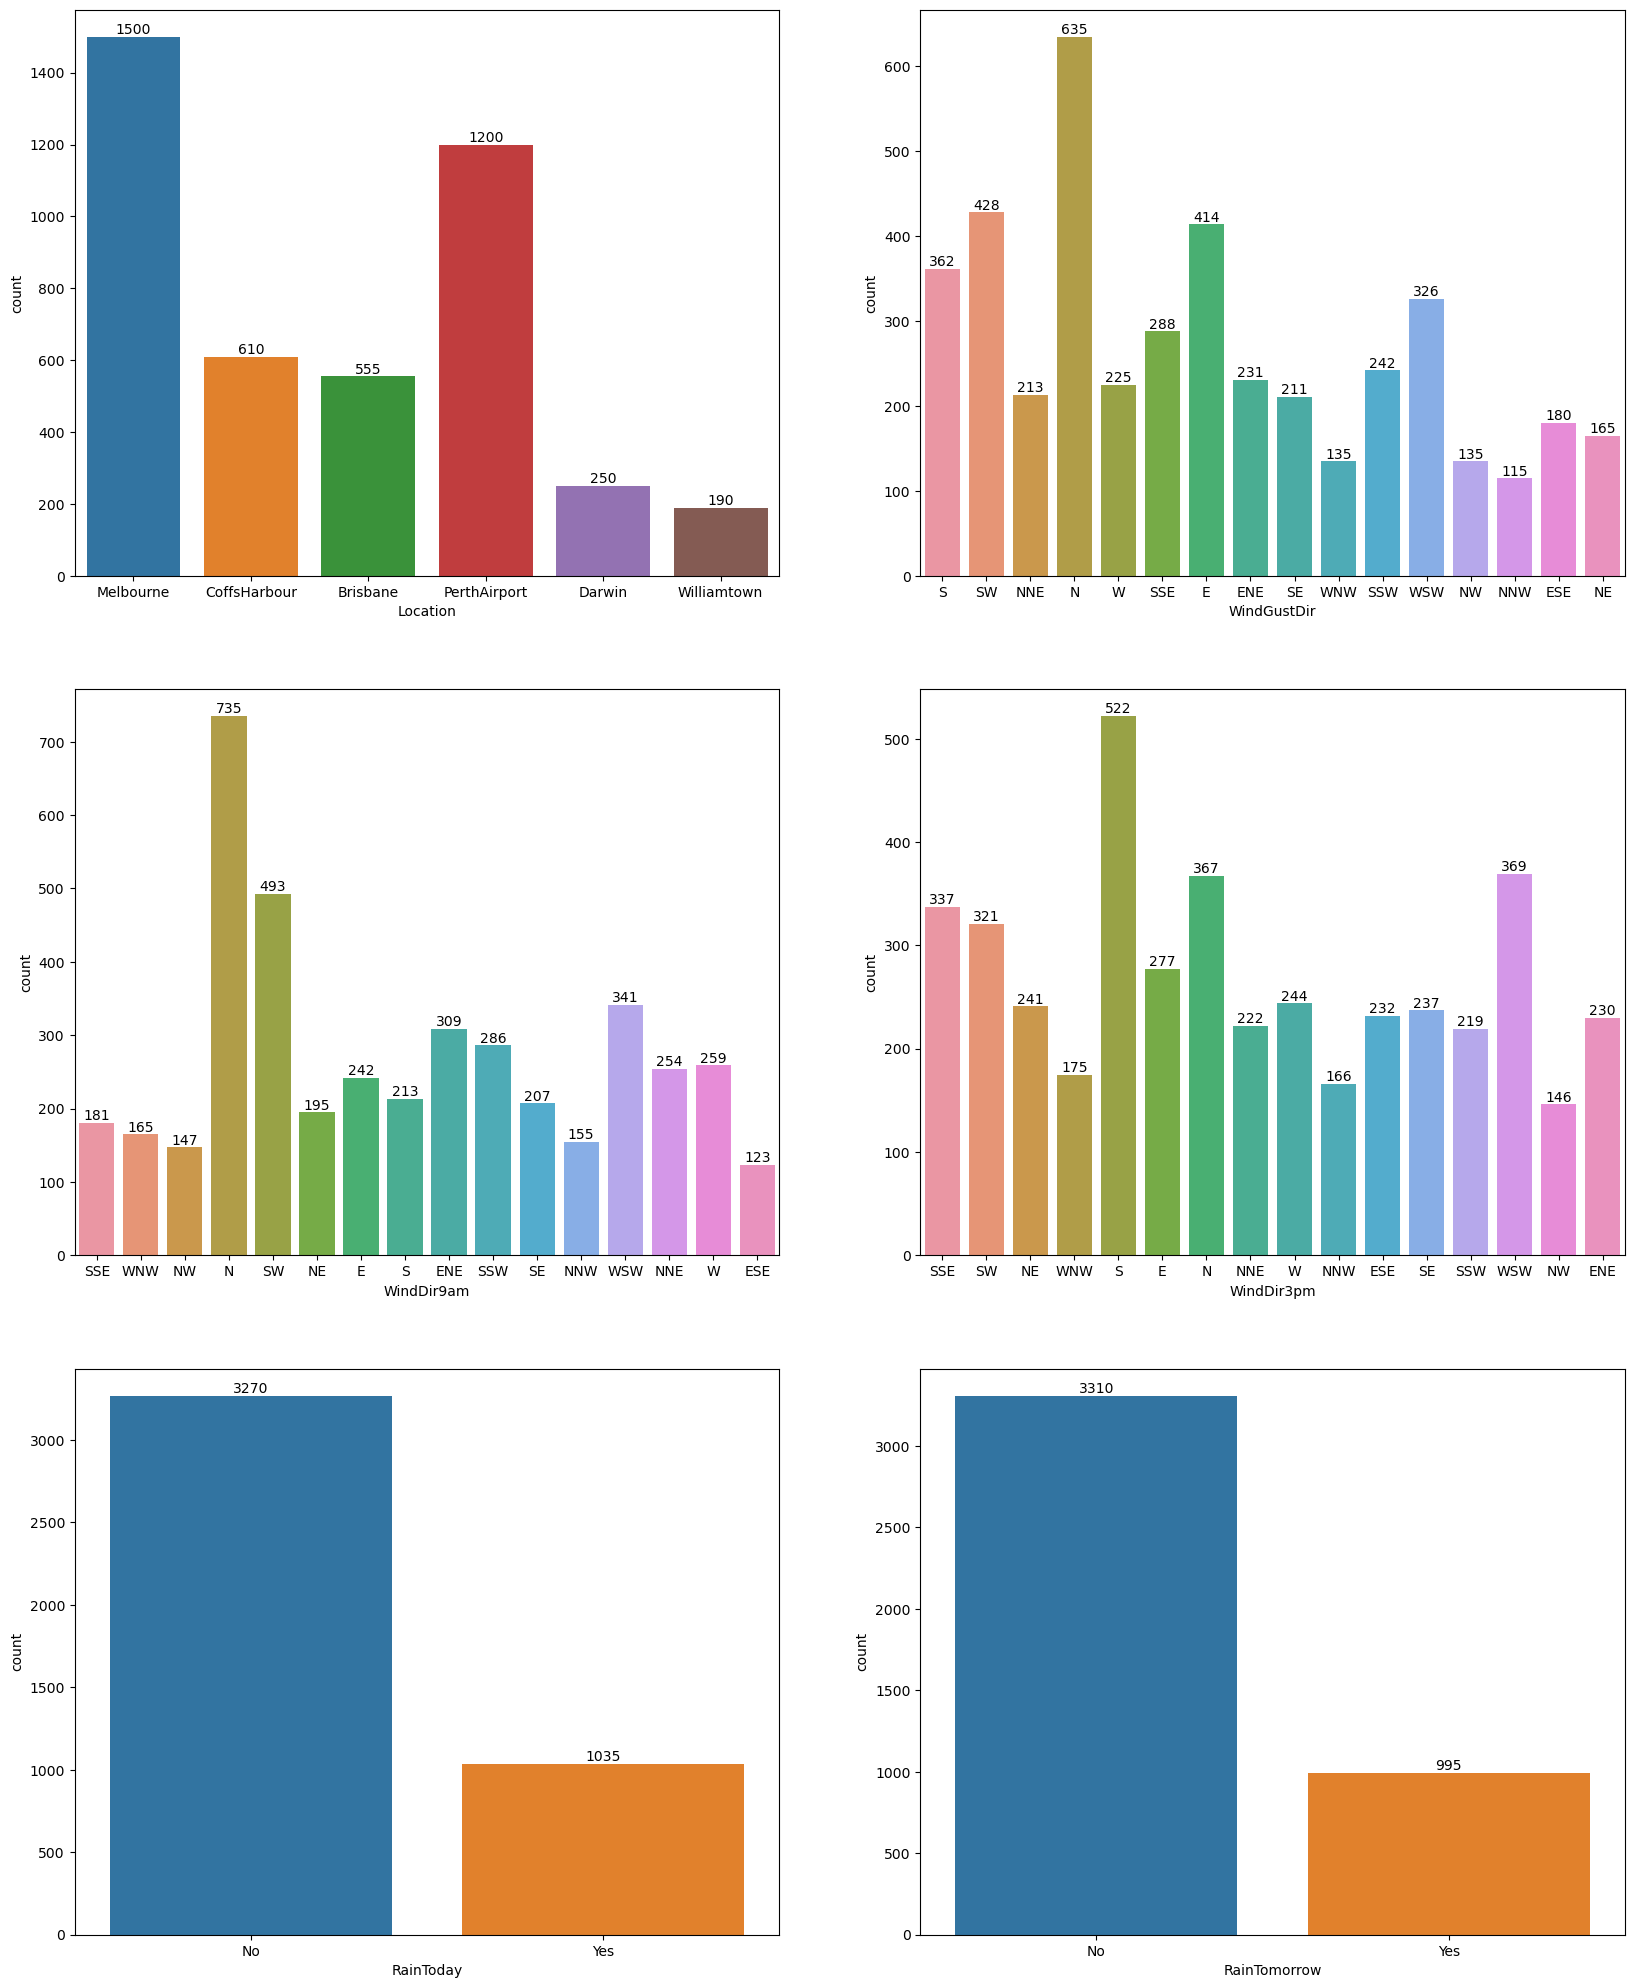

In [231]:
plt.figure(figsize =(20, 25))
plotnumber =1

for i in cat_cols:
    if plotnumber <=6:
        plt.subplot(3, 2, plotnumber)
        ax =sns.countplot(x =i, data =df)
        ax.bar_label(ax.containers[0])
        plt.xlabel(i)
    plotnumber+=1
plt.show()

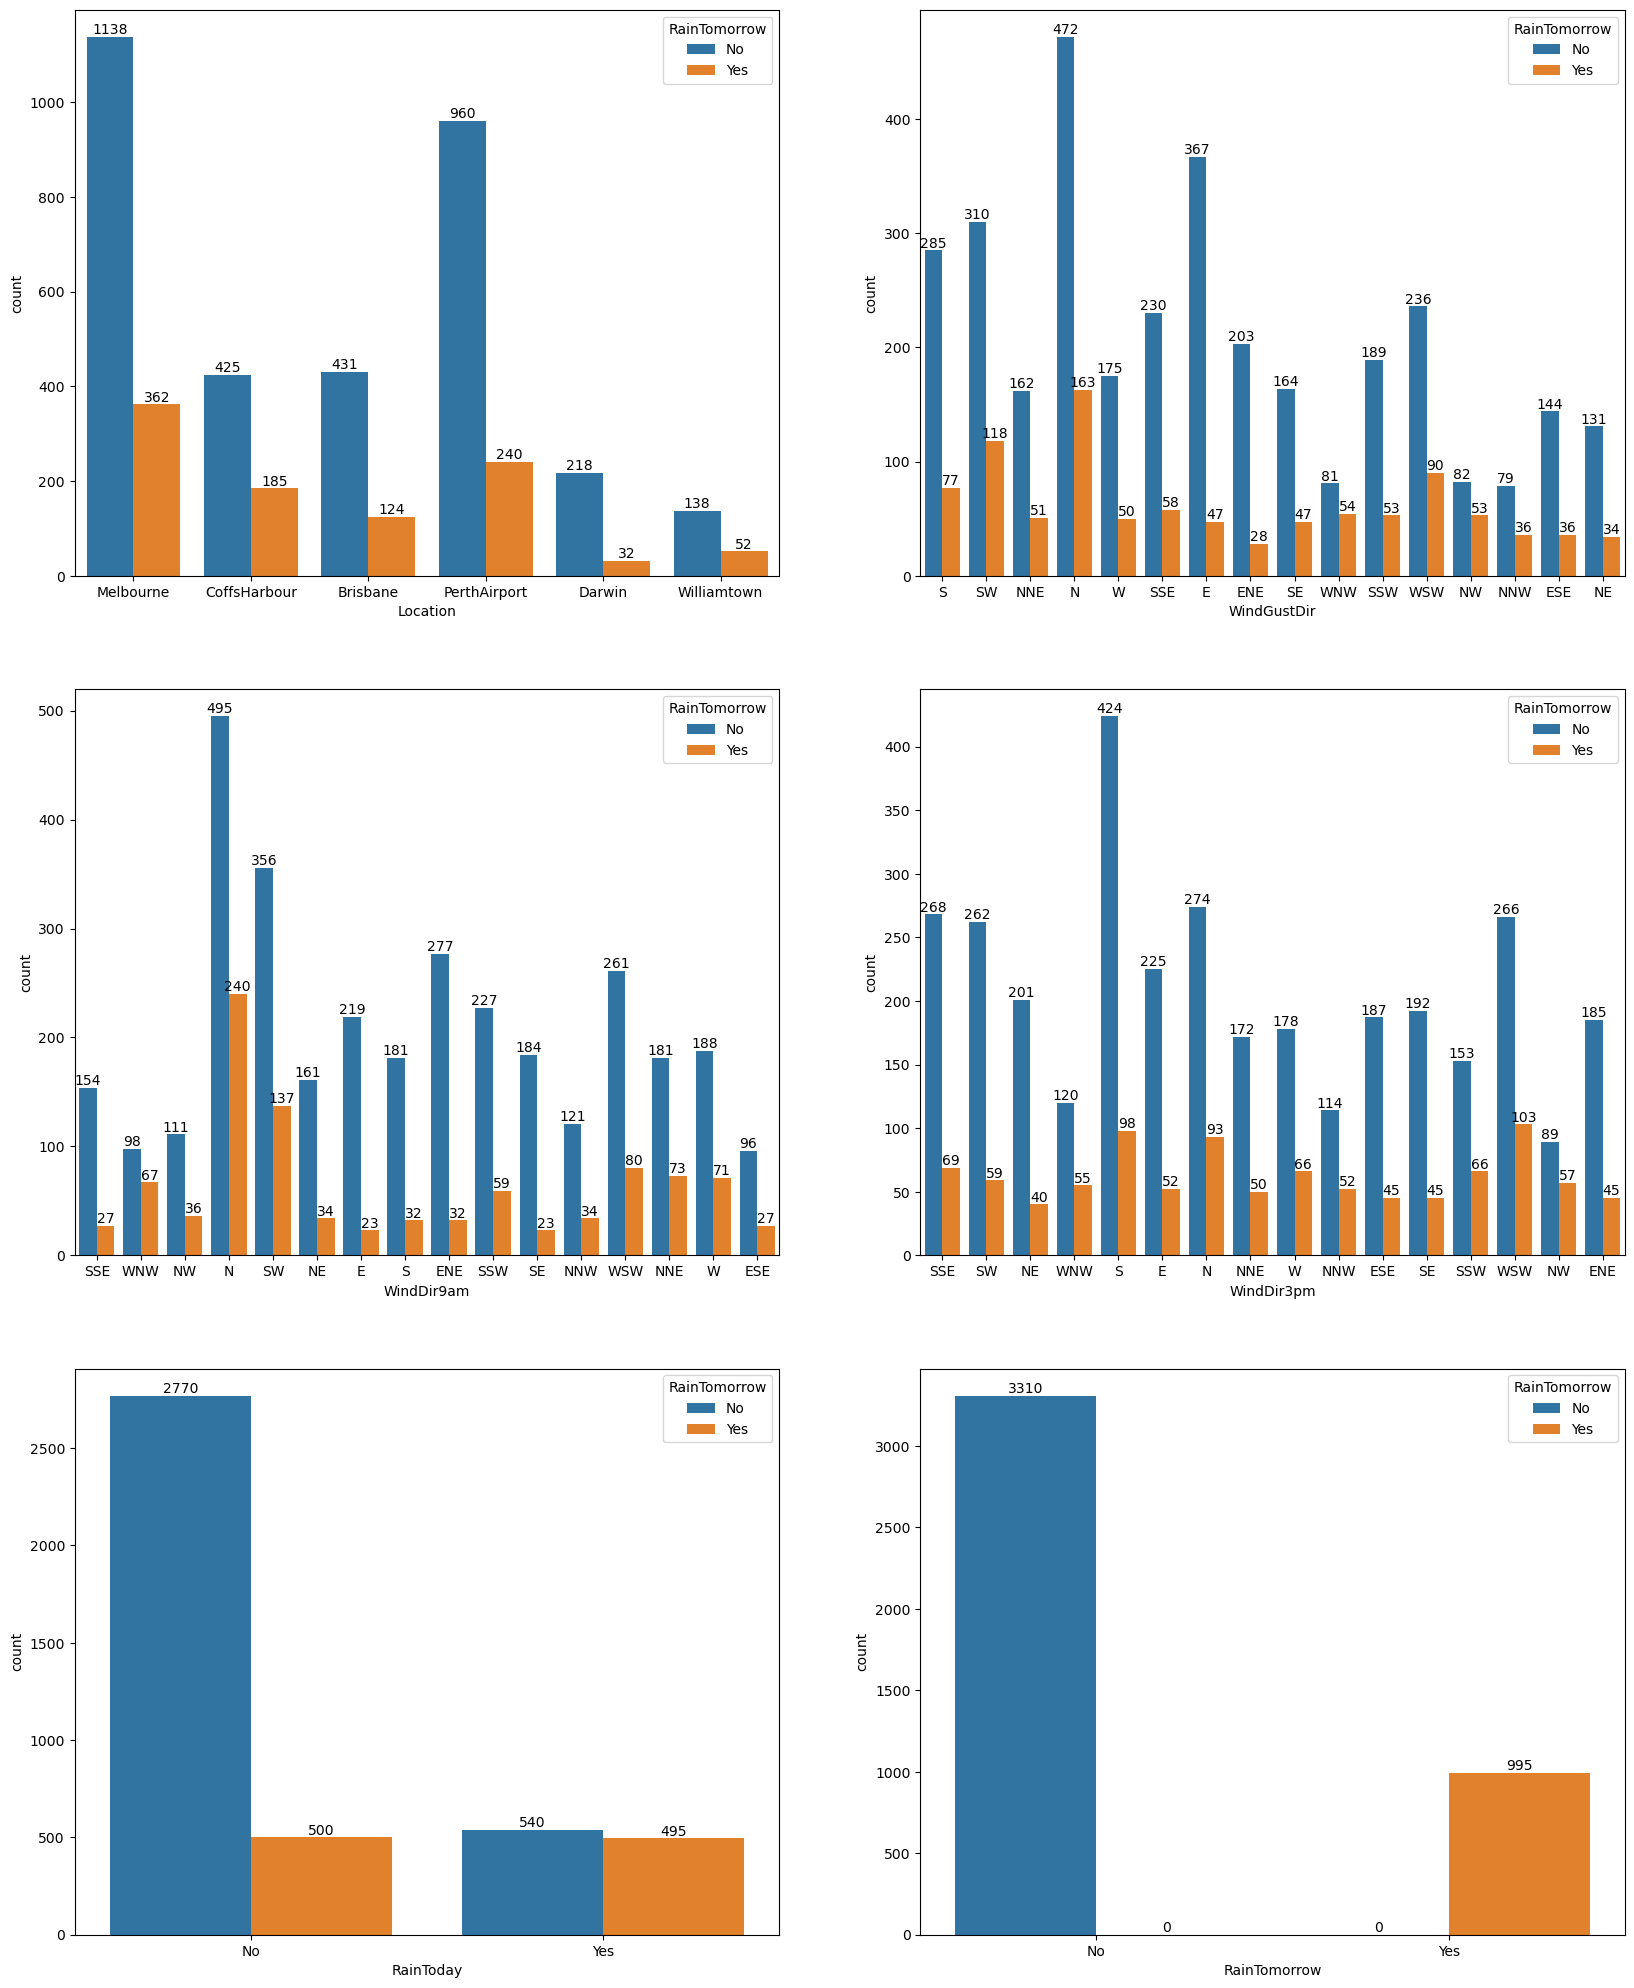

In [232]:
plt.figure(figsize =(20, 25))
plotnumber =1

for i in cat_cols:
    if plotnumber <=6:
        plt.subplot(3, 2, plotnumber)
        ax =sns.countplot(x =i, hue ='RainTomorrow', data =df)
        ax.bar_label(ax.containers[0])
        ax.bar_label(ax.containers[1])
        plt.xlabel(i)
    plotnumber+=1
plt.show()

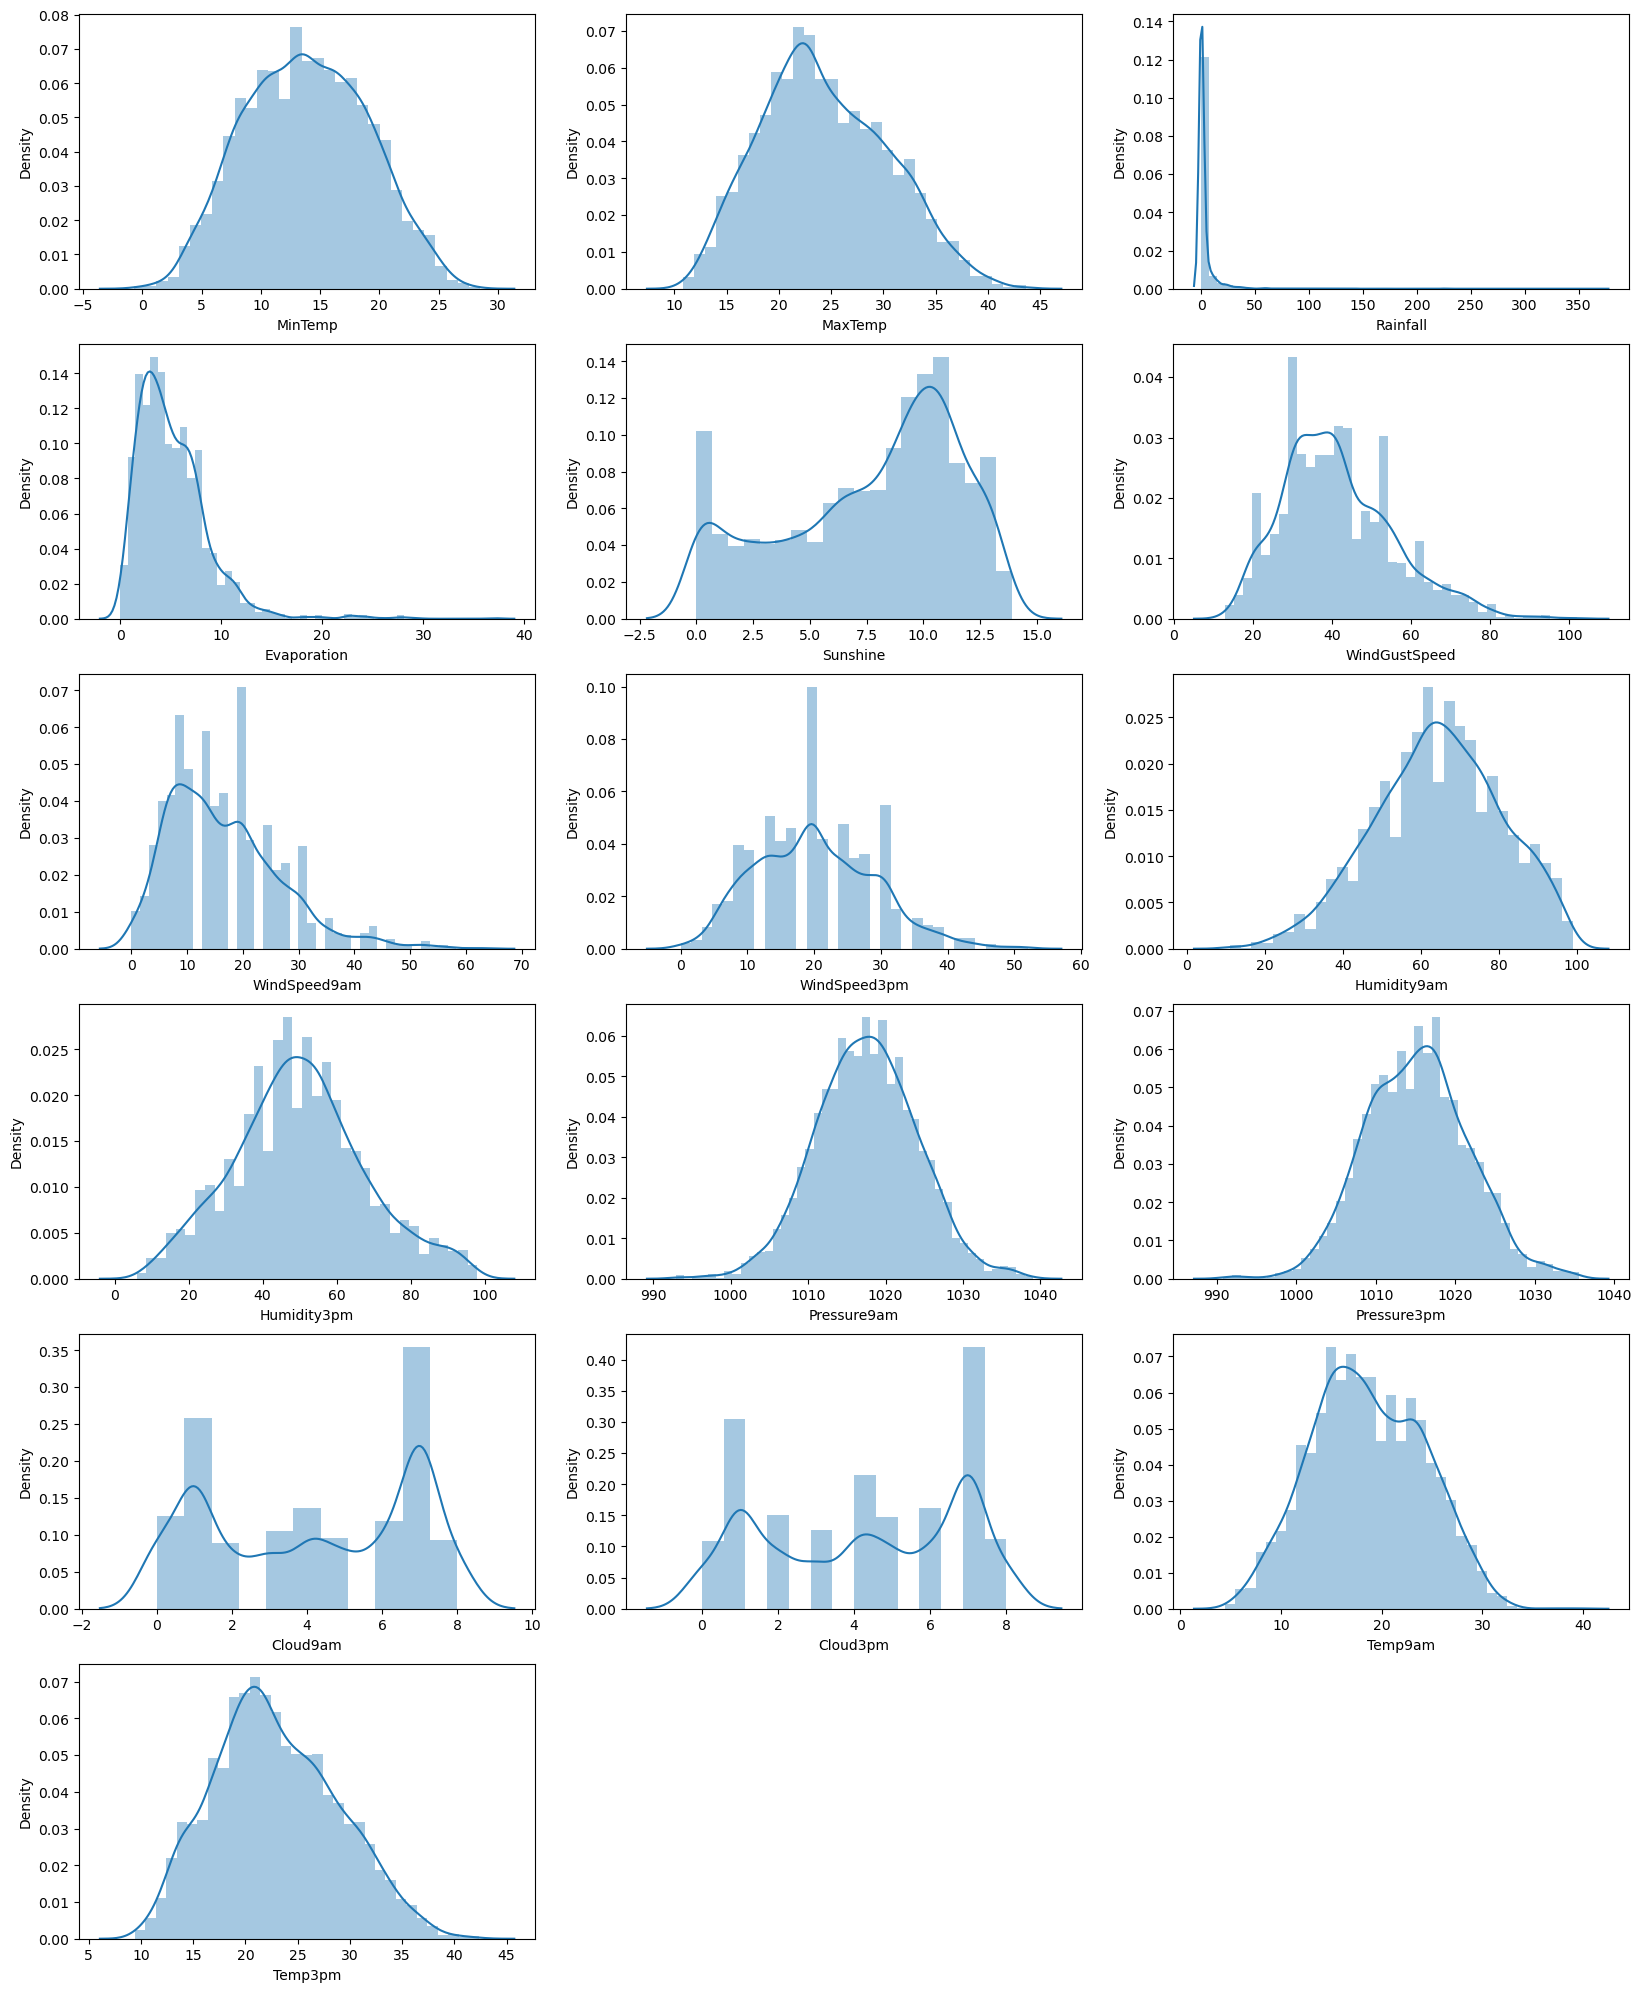

In [233]:
# Checking data distribution in numerical columns
plt.figure(figsize =(20, 25))
plotnumber =1

for i in num_cols:
    if plotnumber <= 16:
        plt.subplot(6, 3, plotnumber)
        sns.distplot(df[i])
        plt.xlabel(i)
    plotnumber+=1
plt.show()

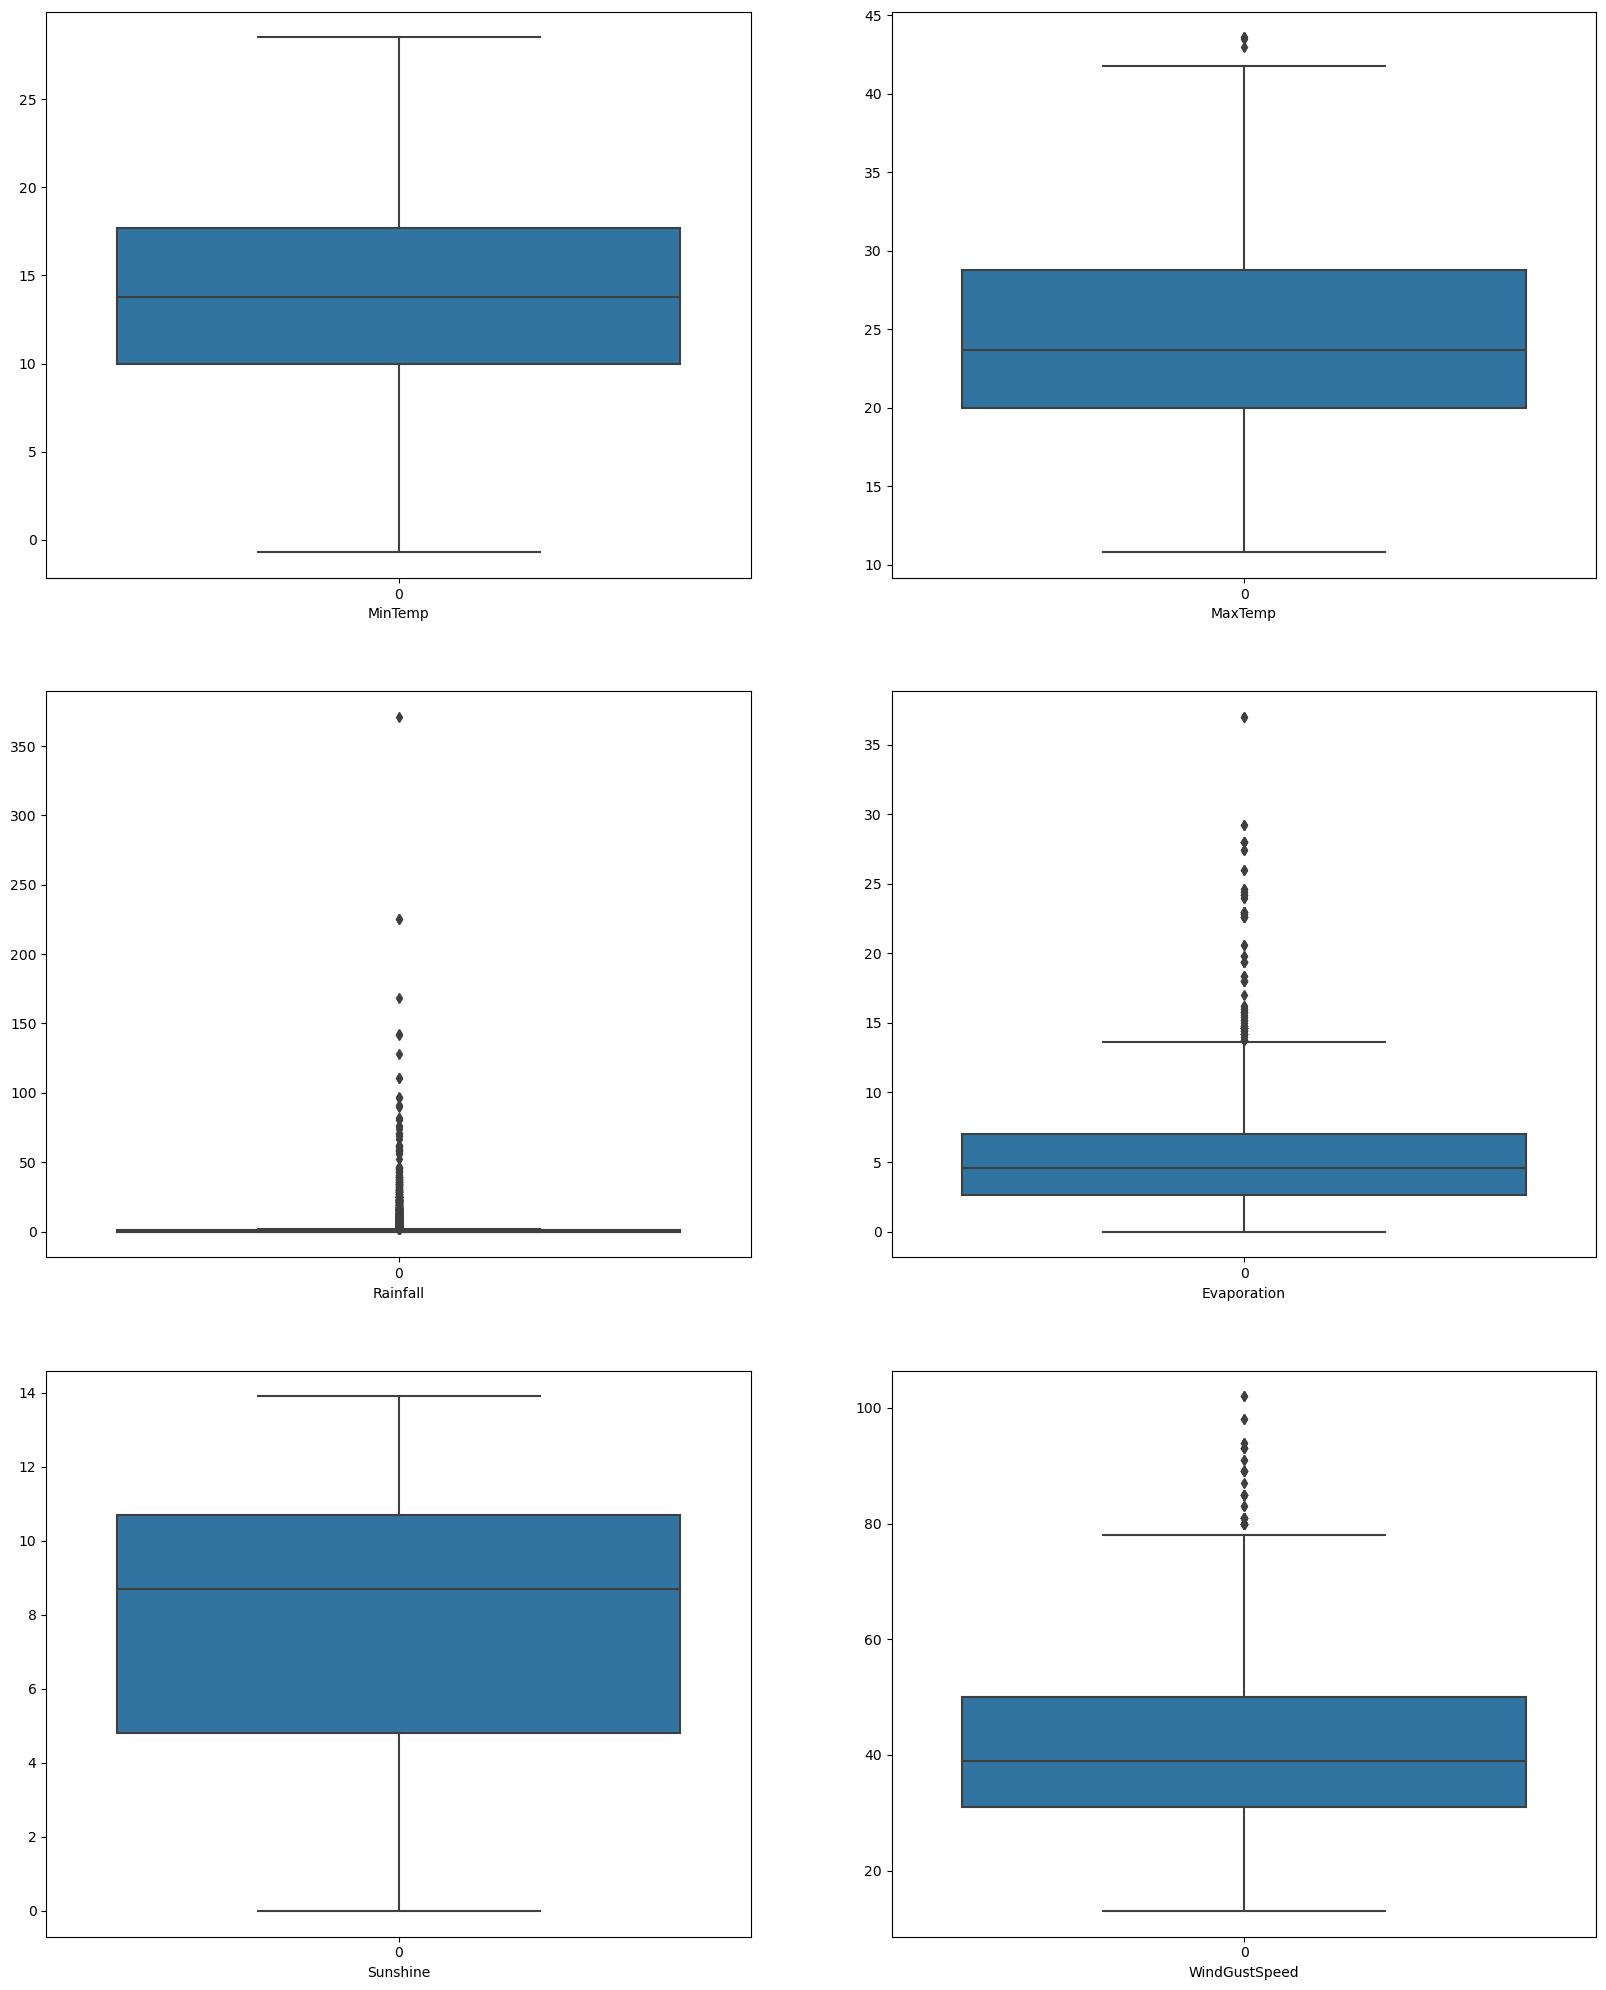

In [234]:
# Checking outliers using boxplot
plt.figure(figsize =(20, 25))
plotnumber =1

for i in num_cols:
    if plotnumber <= 6:
        plt.subplot(3, 2, plotnumber)
        sns.boxplot(df[i])
        plt.xlabel(i)
    plotnumber+=1
plt.show()

In [235]:
# Removing outliers using IQR method
df_iqr =df[['MaxTemp', 'Rainfall', 'Evaporation', 'WindGustSpeed']]

Q1 =df_iqr.quantile(0.25)
Q3 =df_iqr.quantile(0.55)

IQR =Q3-Q1

# For high side
for i in df_iqr:
    high =Q3[i] + (1.5 * IQR[i])
    high_index =np.where(df_iqr[i] > high)
    df_iqr =df_iqr.drop(df_iqr.index[high_index])

In [236]:
# Removing outlier using zscore
df_zscore =df[['MaxTemp', 'Rainfall', 'Evaporation', 'WindGustSpeed']]
z =np.abs(zscore(df_zscore))
df_zscore =df_zscore[(z < 3).all(axis=1)]
df_zscore.shape

(4179, 4)

In [237]:
# Calculating dataloss after removing outliers by IQR and zscore
print("Original shape of dataset :",df.shape[0])
print('\n')
print("Shape of dataset after using IQR method :", df_iqr.shape[0])
print("Data loss after using IQR method :", ((df.shape[0] - df_iqr.shape[0])/df.shape[0])*100)
print('\n')
print("Shape of dataset after using IQR method :", df_zscore.shape[0])
print("Data loss after using IQR method :", ((df.shape[0] - df_zscore.shape[0])/df.shape[0])*100)

Original shape of dataset : 4305


Shape of dataset after using IQR method : 1945
Data loss after using IQR method : 54.81997677119629


Shape of dataset after using IQR method : 4179
Data loss after using IQR method : 2.9268292682926833


__We will use zscore to remove outliers, as data loss is only 2.92

In [239]:
# Removing outliers using zscore
df =df[(z < 3).all(axis =1)]
df.shape

(4179, 23)

In [240]:
# Resetting index
df.reset_index(drop =True, inplace =True)

In [241]:
# Checking skewness in the dataset
df[num_cols].skew()

MinTemp          0.068662
MaxTemp          0.262985
Rainfall         3.670372
Evaporation      0.785789
Sunshine        -0.553780
WindGustSpeed    0.561076
WindSpeed9am     0.921521
WindSpeed3pm     0.355599
Humidity9am     -0.203711
Humidity3pm      0.199405
Pressure9am      0.048559
Pressure3pm      0.093006
Cloud9am        -0.130859
Cloud3pm        -0.160900
Temp9am          0.076060
Temp3pm          0.273466
dtype: float64

In [242]:
# Removing outliers using cbrt method
df['Evaporation'] =np.cbrt(df['Evaporation'])
df['WindSpeed9am'] =np.cbrt(df['WindSpeed9am'])

In [243]:
# Checking skewness in the dataset
df[num_cols].skew()

MinTemp          0.068662
MaxTemp          0.262985
Rainfall         3.670372
Evaporation     -0.403925
Sunshine        -0.553780
WindGustSpeed    0.561076
WindSpeed9am    -0.955606
WindSpeed3pm     0.355599
Humidity9am     -0.203711
Humidity3pm      0.199405
Pressure9am      0.048559
Pressure3pm      0.093006
Cloud9am        -0.130859
Cloud3pm        -0.160900
Temp9am          0.076060
Temp3pm          0.273466
dtype: float64

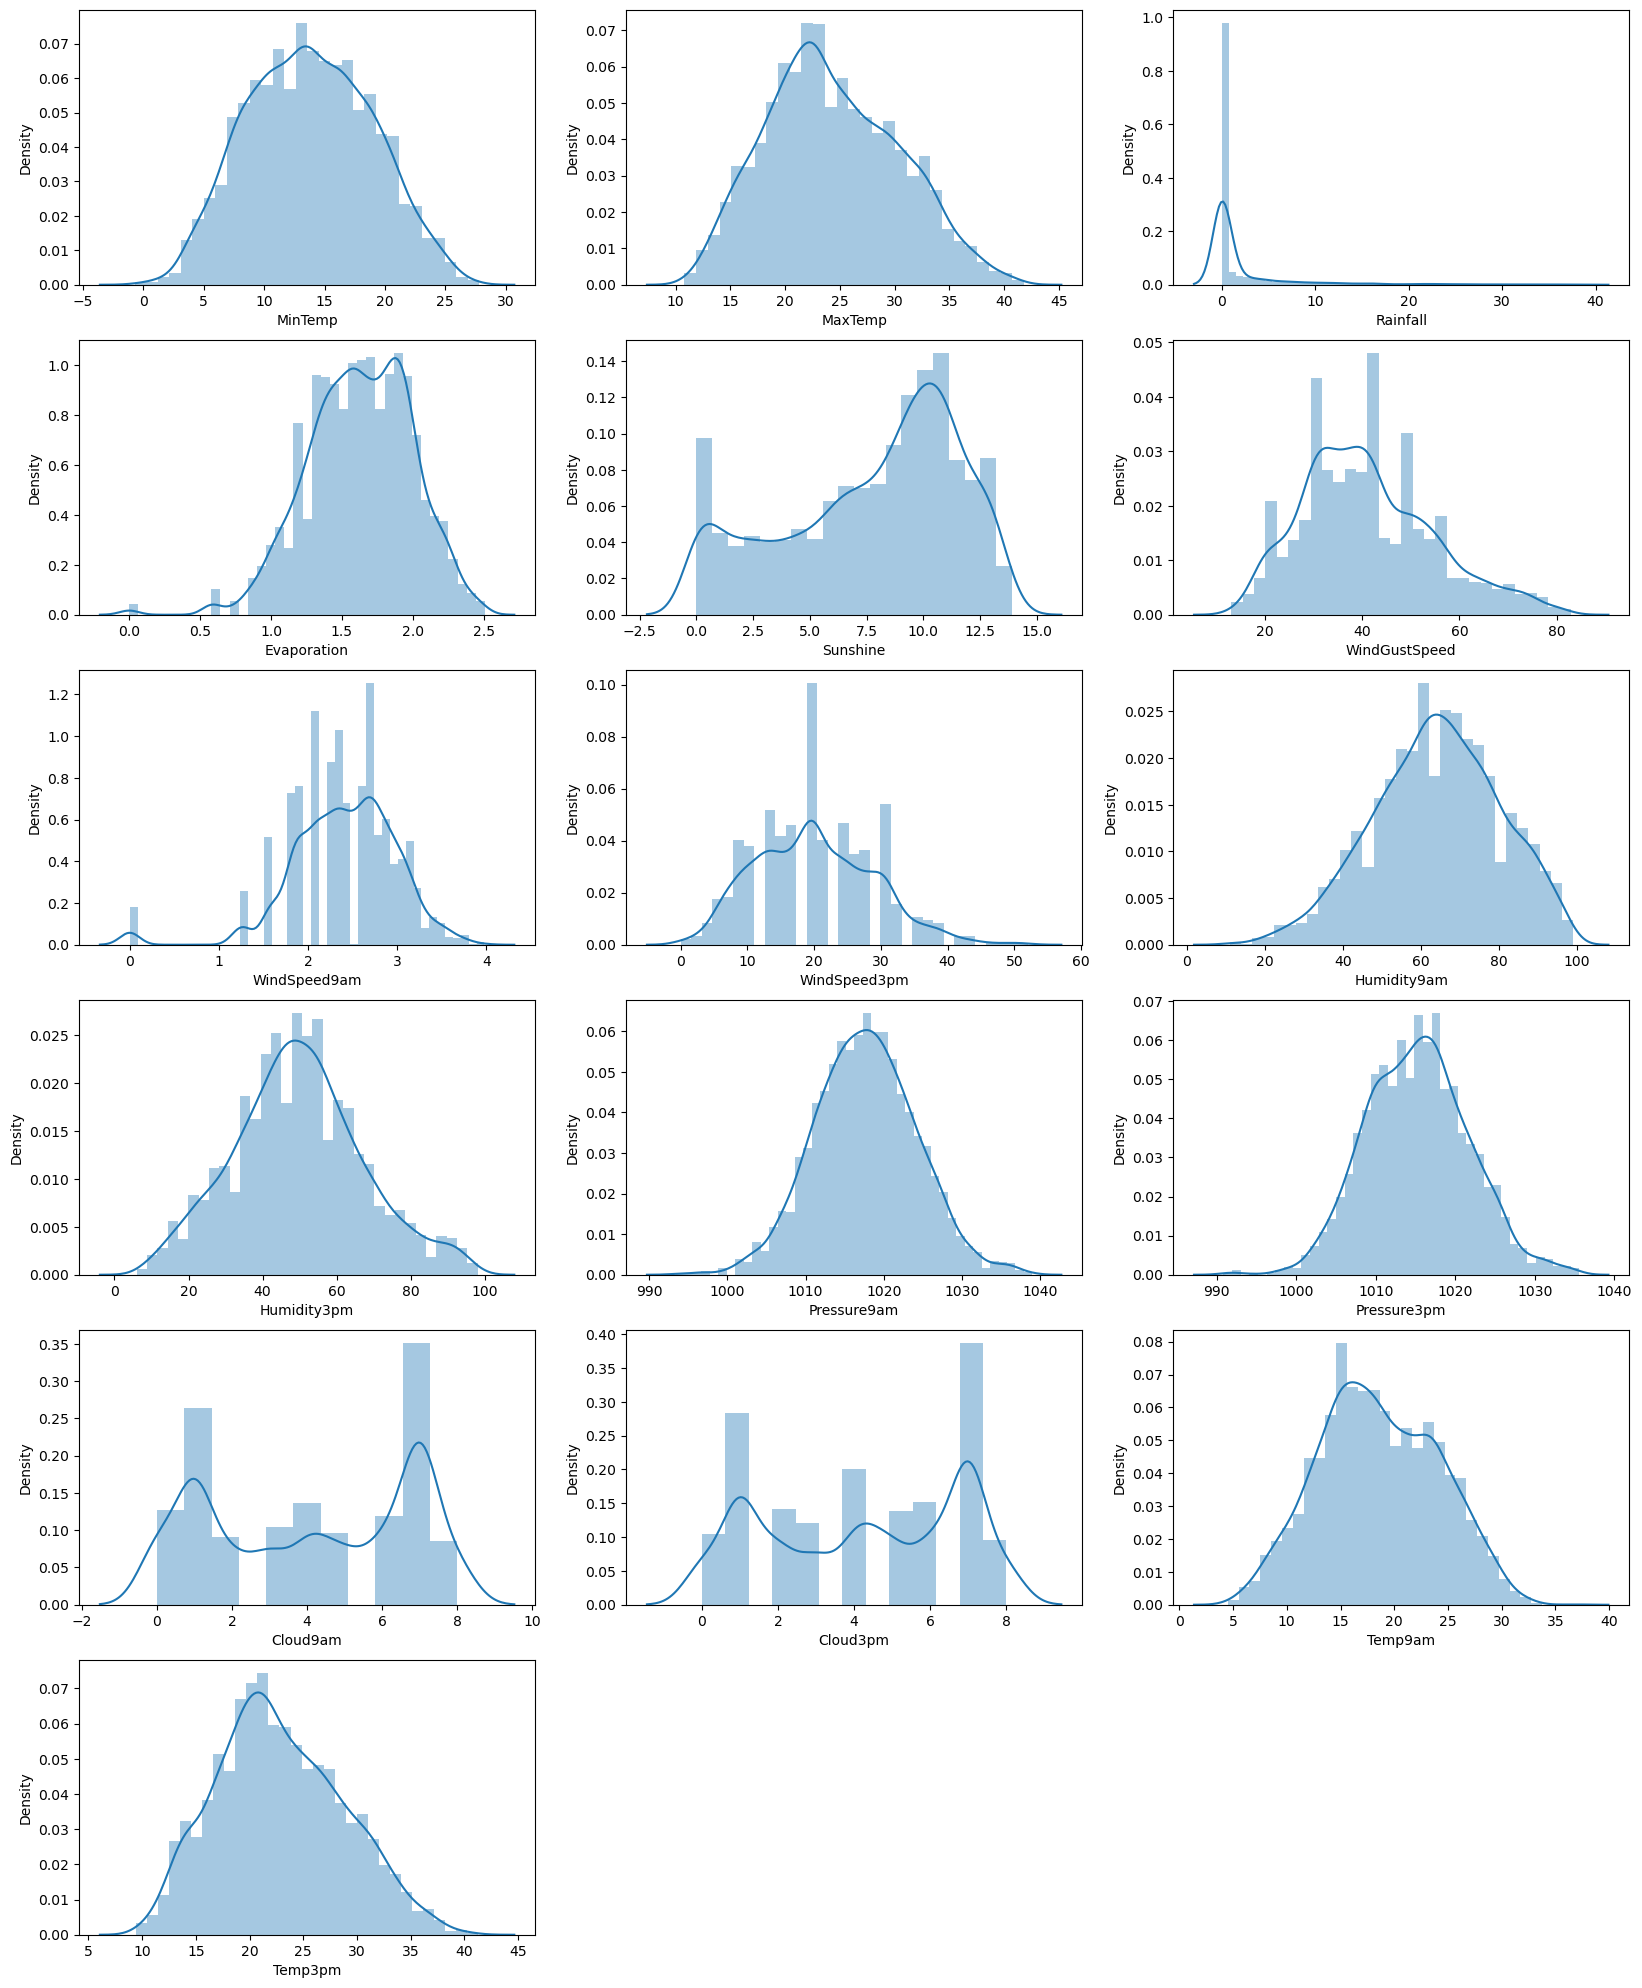

In [244]:
# Checking data distribution in numerical columns
plt.figure(figsize =(20, 25))
plotnumber =1

for i in num_cols:
    if plotnumber <= 16:
        plt.subplot(6, 3, plotnumber)
        sns.distplot(df[i])
        plt.xlabel(i)
    plotnumber+=1
plt.show()

In [245]:
# Encoding categorical column using OrdinalEncoder
OE =OrdinalEncoder()

for i in df.dtypes.index:
    if df[i].dtypes =='object':
        df[i] =OE.fit_transform(df[i].values.reshape(-1, 1))
        
df

Date  Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0    2010-01-21       3.0     16.0     28.5       0.0     1.966095       8.3   
1    2010-09-10       3.0      9.4     14.4       2.6     1.532619       5.4   
2    2009-07-12       1.0      6.4     20.2       0.0     1.000000       9.7   
3    2011-08-21       3.0      6.1     21.4       0.0     1.300591       9.6   
4    2012-09-02       0.0      7.3     22.4       0.0     1.686865      11.0   
...         ...       ...      ...      ...       ...          ...       ...   
4174 2011-09-16       4.0     13.9     20.8      19.2     1.259921       5.6   
4175 2010-04-25       3.0     12.2     20.1       0.4     1.638643       6.8   
4176 2010-06-30       3.0      6.8     12.8       1.8     1.216440       2.7   
4177 2012-03-20       4.0     13.8     27.7       0.0     2.048800      11.1   
4178 2012-04-17       0.0     18.4     25.4       7.2     1.560491       4.6   

      WindGustDir  WindGustSpeed  WindDir9am  ...  Humidity9am  Humidity3pm  \
0             8.0           37.0        10.0  ...         61.0         36.0   
1            12.0           52.0        14.0  ...         74.0         80.0   
2             5.0           30.0         7.0  ...         76.0         60.0   
3             3.0           30.0         3.0  ...         73.0         35.0   
4             8.0           20.0        12.0  ...         55.0         36.0   
...           ...            ...         ...  ...          ...          ...   
4174          7.0           54.0         3.0  ...         86.0         58.0   
4175         12.0           44.0        13.0  ...         70.0         55.0   
4176          3.0           59.0         3.0  ...         80.0         59.0   
4177         10.0           39.0         8.0  ...         51.0         27.0   
4178          0.0           26.0         9.0  ...         92.0         61.0   

      Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
0          1011.8       1009.2   5.00000  5.000000     19.7     27.9   
1          1002.1       1006.0   7.00000  7.000000     10.9     11.8   
2          1017.1       1013.2   1.00000  0.000000     14.6     18.6   
3          1036.4       1034.4   4.15922  4.246142      9.3     20.3   
4          1024.0       1019.8   0.00000  1.000000     14.8     20.7   
...           ...          ...       ...       ...      ...      ...   
4174       1015.5       1013.3   7.00000  5.000000     18.0     20.4   
4175       1017.4       1019.6   4.00000  6.000000     14.0     17.5   
4176       1016.9       1016.3   7.00000  7.000000      7.6     11.8   
4177       1018.9       1014.6   1.00000  1.000000     19.1     26.7   
4178       1018.2       1014.8   7.00000  3.000000     20.8     24.6   

      RainToday  RainTomorrow  
0           0.0           0.0  
1           1.0           0.0  
2           0.0           0.0  
3           0.0           0.0  
4           0.0           0.0  
...         ...           ...  
4174        1.0           1.0  
4175        0.0           0.0  
4176        1.0           0.0  
4177        0.0           0.0  
4178        1.0           0.0  

[4179 rows x 23 columns]

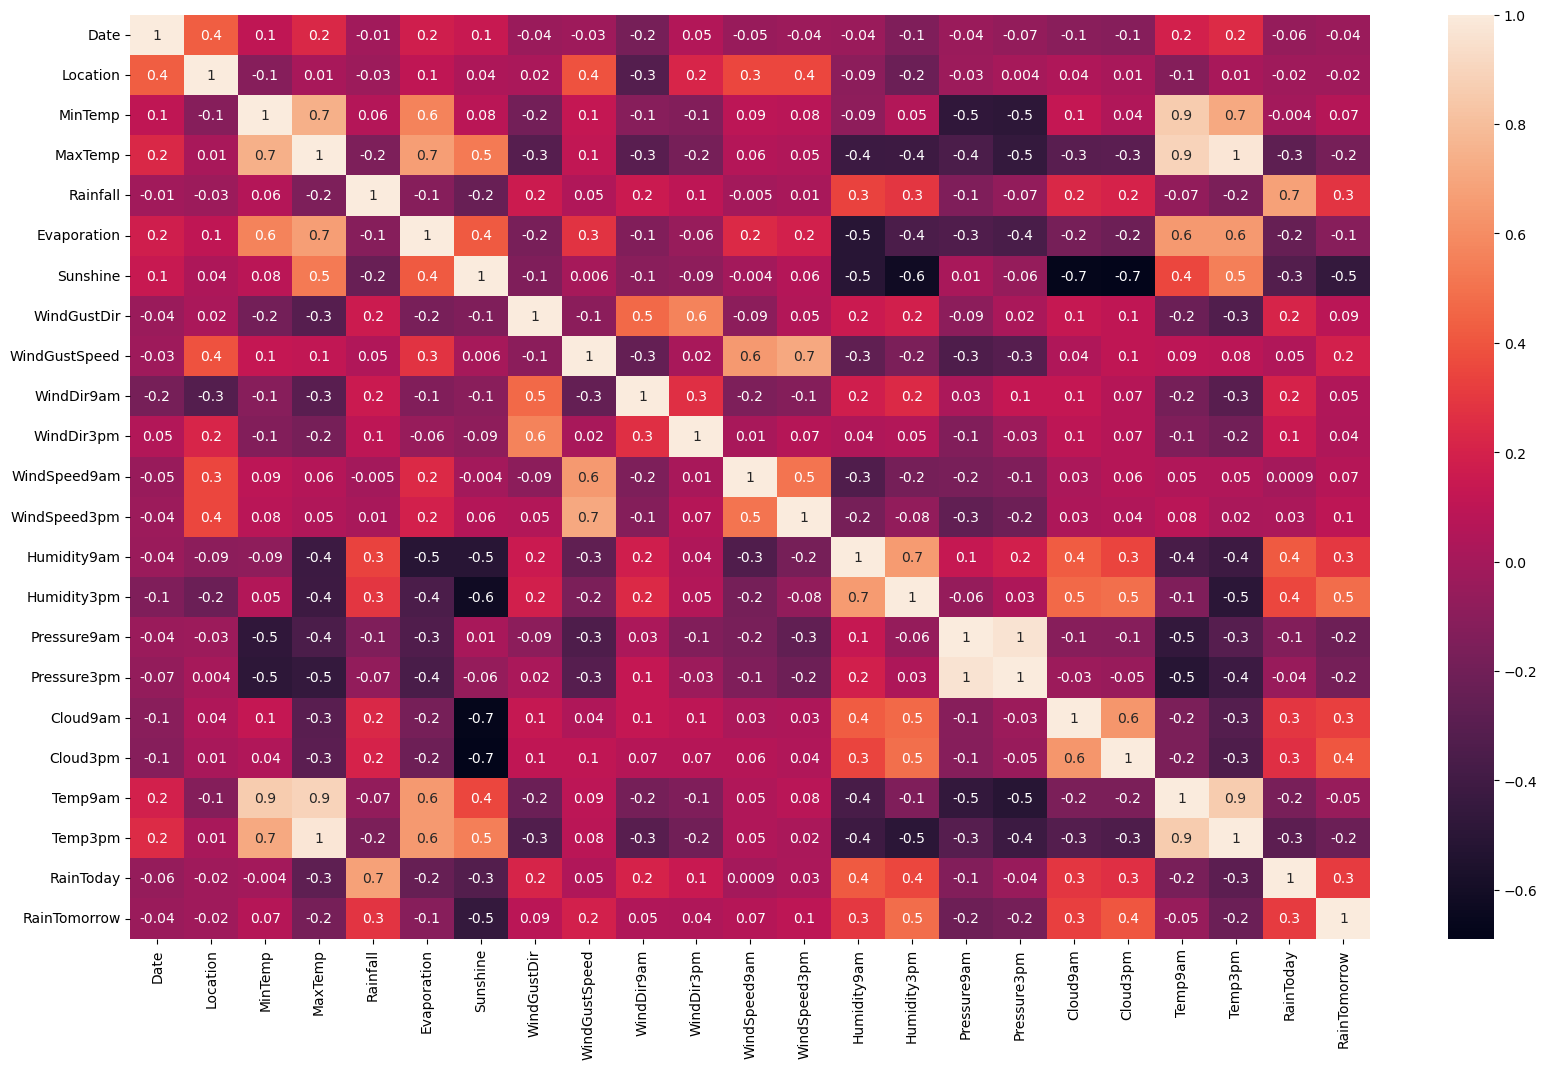

In [246]:
# Plotting heatmap
plt.figure(figsize =(20, 12))
sns.heatmap(df.corr(), annot =True, fmt ='.1g')
plt.show()

__As per the above heatmap, we found multicollinearity between.__
     1. MinTemp and Temp9am
     2. MaxTemp and Temp9am
     3. Temp9am and Temp3pm

__Plotting scatterplot to confirm multicollinearity.__

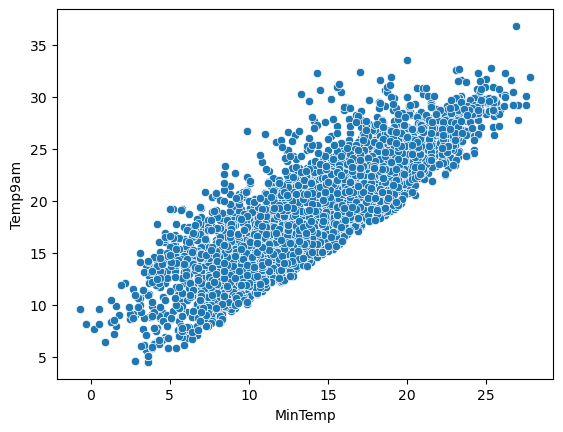

In [247]:
#MinTemp and Temp9am
sns.scatterplot(x ='MinTemp', y ='Temp9am', data =df)
plt.show()

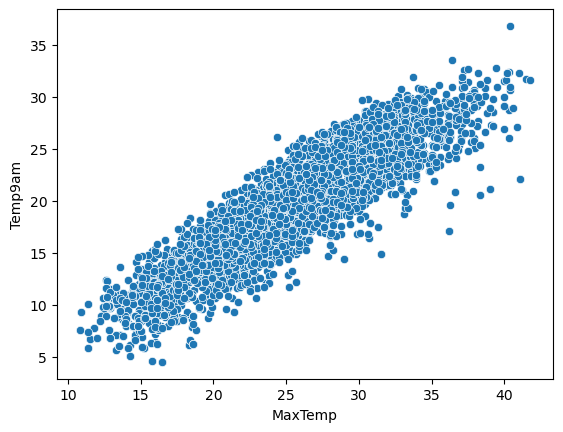

In [248]:
#MaxTemp and Temp9am
sns.scatterplot(x ='MaxTemp', y ='Temp9am', data =df)
plt.show()

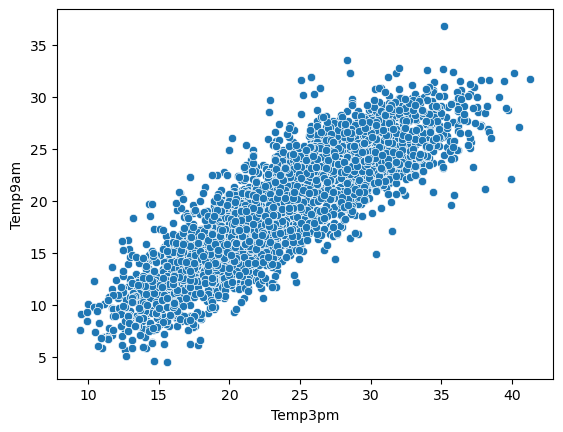

In [249]:
#Temp3pm and Temp9am
sns.scatterplot(x ='Temp3pm', y ='Temp9am', data =df)
plt.show()

__From the above scatter plot, multicollinearity is confirmed between__
     1. MinTemp and Temp9am
     2. MaxTemp and Temp9am
     3. Temp9am and Temp3pm

In [250]:
# Dropping Temp9am
df.drop(columns =['Temp9am'], inplace =True)

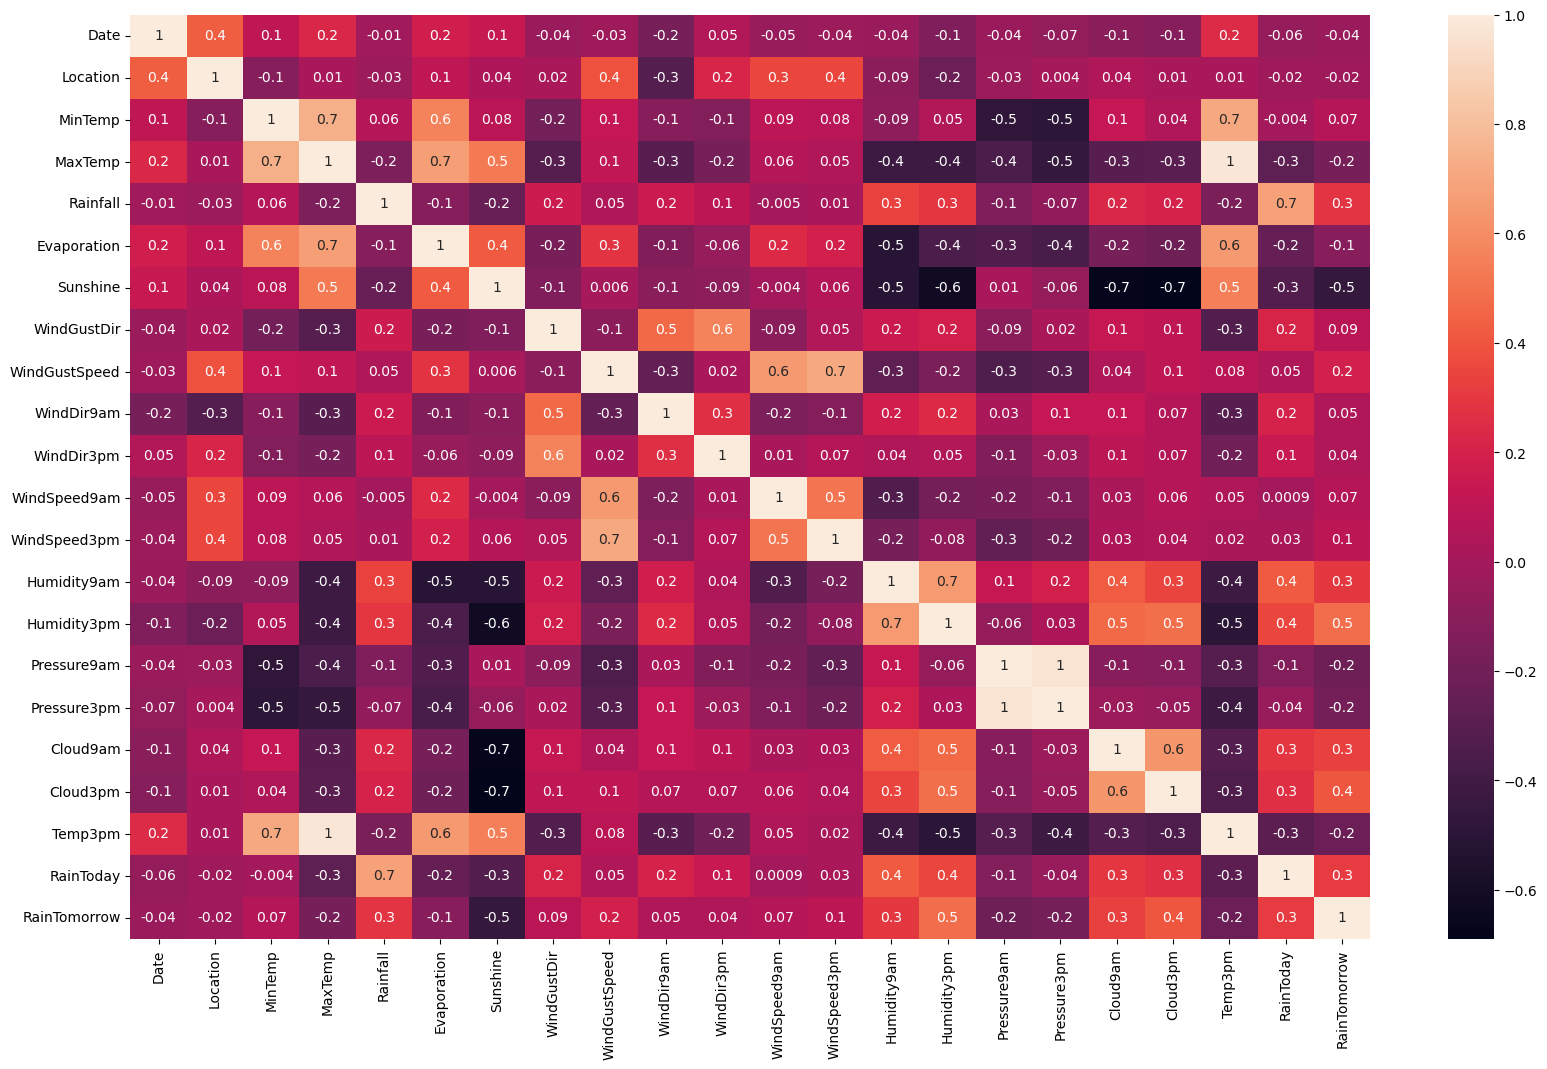

In [251]:
# Again Plotting heatmap
plt.figure(figsize =(20, 12))
sns.heatmap(df.corr(), annot =True, fmt ='.1g')
plt.show()

In [252]:
# Setting date column as index
df.set_index('Date', inplace =True)

In [253]:
# Seperating Features and label
x =df.drop(columns =['Rainfall'])
y =df[['Rainfall']]

In [254]:
# Standardizing data using StandardScaler
scaler =StandardScaler()
x =pd.DataFrame(scaler.fit_transform(x), columns =x.columns)
x

Location   MinTemp   MaxTemp  Evaporation  Sunshine  WindGustDir  \
0     0.264419  0.430445  0.685922     0.922304  0.148058     0.164244   
1     0.264419 -0.853161 -1.645696    -0.260753 -0.605389     0.997985   
2    -1.122038 -1.436617 -0.686591    -1.714392  0.511792    -0.461061   
3     0.264419 -1.494963 -0.488155    -0.894009  0.485811    -0.877931   
4    -1.815267 -1.261580 -0.322792     0.160221  0.849544     0.164244   
...        ...       ...       ...          ...       ...          ...   
4174  0.957647  0.022025 -0.587373    -1.005008 -0.553427    -0.044191   
4175  0.264419 -0.308601 -0.703127     0.028610 -0.241656     0.997985   
4176  0.264419 -1.358823 -1.910277    -1.123677 -1.306875    -0.877931   
4177  0.957647  0.002576  0.553632     1.148023  0.875525     0.581114   
4178 -1.815267  0.897210  0.173297    -0.184684 -0.813237    -1.503237   

      WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  \
0         -0.297274    0.538652    0.500706     -1.001556     -0.339978   
1          0.809119    1.373913    0.934330      0.933730      1.911728   
2         -0.813590   -0.087793   -0.800165      0.095183     -0.002222   
3         -0.813590   -0.923054    1.367954      0.662614     -0.790319   
4         -1.551186    0.956283   -0.800165     -1.001556     -1.240660   
...             ...         ...         ...           ...           ...   
4174       0.956638   -0.923054    1.367954     -0.314105      1.686558   
4175       0.219043    1.165098    0.717518      0.662614      0.448119   
4176       1.325436   -0.923054   -0.366541      1.058921      0.448119   
4177      -0.149754    0.121022    0.283894      0.436813     -0.339978   
4178      -1.108628    0.329837   -1.667412     -1.943029     -1.240660   

      Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0       -0.191534    -0.788299    -0.898662    -0.932852  0.329052  0.308990   
1        0.612039     1.720978    -2.384486    -1.426970  1.072315  1.091855   
2        0.735666     0.580397    -0.086820    -0.315203 -1.157474 -1.648171   
3        0.550226    -0.845328     2.869509     2.958333  0.016592  0.013906   
4       -0.562414    -0.788299     0.970106     0.703917 -1.529106 -1.256739   
...           ...          ...          ...          ...       ...       ...   
4174     1.353799     0.466339    -0.331904    -0.299762  1.072315  0.308990   
4175     0.364786     0.295252    -0.040867     0.673034 -0.042579  0.700422   
4176     0.982919     0.523368    -0.117456     0.163474  1.072315  1.091855   
4177    -0.809668    -1.301560     0.188900    -0.099026 -1.157474 -1.256739   
4178     1.724679     0.637426     0.081675    -0.068144  1.072315 -0.473874   

       Temp3pm  RainToday  RainTomorrow  
0     0.857493  -0.549426     -0.536126  
1    -1.871046   1.820081     -0.536126  
2    -0.718620  -0.549426     -0.536126  
3    -0.430513  -0.549426     -0.536126  
4    -0.362723  -0.549426     -0.536126  
...        ...        ...           ...  
4174 -0.413566   1.820081      1.865234  
4175 -0.905042  -0.549426     -0.536126  
4176 -1.871046   1.820081     -0.536126  
4177  0.654124  -0.549426     -0.536126  
4178  0.298227   1.820081     -0.536126  

[4179 rows x 20 columns]

In [255]:
# Checking variance inflaction factor
vif =pd.DataFrame()
vif['VIF Score'] =[variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif['Features'] =x.columns
vif

VIF Score       Features
0    1.742048       Location
1    6.092990        MinTemp
2   32.017477        MaxTemp
3    2.478172    Evaporation
4    3.734530       Sunshine
5    1.900526    WindGustDir
6    3.226686  WindGustSpeed
7    1.736885     WindDir9am
8    1.659991     WindDir3pm
9    2.013681   WindSpeed9am
10   2.216931   WindSpeed3pm
11   2.823388    Humidity9am
12   4.356638    Humidity3pm
13  23.806067    Pressure9am
14  23.061721    Pressure3pm
15   2.381824       Cloud9am
16   2.283373       Cloud3pm
17  37.055289        Temp3pm
18   1.445477      RainToday
19   1.618889   RainTomorrow

In [256]:
# Deleting columns having vif score more than 10
x.drop(columns =['MaxTemp', 'Pressure9am', 'Pressure3pm', 'Temp3pm'], inplace =True)

# EDA Completed

## Model Building

### Finding Best Random State

In [258]:
maxrs =0
maxacc =0

for i in range(1, 200):
    x_train, x_test, y_train, y_test =train_test_split(x, y, test_size =0.3, random_state =i)
    LR =LinearRegression()
    LR.fit(x_train, y_train)
    pred =LR.predict(x_test)
    acc =r2_score(y_test, pred)
    
    if acc > maxacc:
        maxacc =acc
        maxrs =i
        
print("Maximum accuracy is :", maxacc, "at random state :",maxrs)

Maximum accuracy is : 0.5132304907802614 at random state : 115


In [259]:
x_train, x_test, y_train, y_test =train_test_split(x, y, test_size =0.3, random_state =maxrs)

In [261]:
# Initializing models
RFC =RandomForestRegressor()
ETC =ExtraTreesRegressor()
svr =SVR()
GBC =GradientBoostingRegressor()
ABC =AdaBoostRegressor()
BC =BaggingRegressor()
DTC =DecisionTreeRegressor()
LR =LinearRegression()
lasso =Lasso()
ridge =Ridge()

In [266]:
# Building models

models ={'RandomForestRegressor' :RFC,
        'ExtraTreesRegressor ': ETC,
        'SVR ': svr,
        'GradientBoostingRegressor ': GBC,
        "AdaBoostRegressor ": ABC,
        'BaggingRegressor ': BC,
        'DecisionTreeRegressor ': DTC,
        'LinearRegression' :LR,
        'Lasso' :lasso,
        'Ridge' :ridge}

for name, model in models.items():
    model.fit(x_train, y_train)
    pred_test =model.predict(x_test)
    pred_train =model.predict(x_train)
    acc =r2_score(y_test, pred_test)
    
    print("Model Name :", name)
    print('*'*20)
    print("Accuracy of model on training data :", (r2_score(y_train, pred_train))*100)
    print("Accuracy of model on test data :", (r2_score(y_test, pred_test))*100)
    print("Mean Squared Error :", mean_squared_error(y_test, pred_test))
    print("Mean Absolute Error :", mean_absolute_error(y_test, pred_test))
    print("Root Mean Squared Error :", np.sqrt(mean_squared_error(y_test, pred_test)))
    
    print('\n')
    print("Cross Validation for the model :", name)
    print("*"*30)
    score =cross_val_score(model, x, y, cv=5)
    print(score)
    print(score.mean())
    print("Difference between accuracy of the model and cross validation is :", (acc -(score.mean()))*100)
    print("="*80)
    print('\n')

Model Name : RandomForestRegressor
********************
Accuracy of model on training data : 93.87180346394477
Accuracy of model on test data : 64.21193194084096
Mean Squared Error : 8.501790066985649
Mean Absolute Error : 1.0622615629984054
Root Mean Squared Error : 2.9157829252167673


Cross Validation for the model : RandomForestRegressor
******************************
[0.63180456 0.60797025 0.60366063 0.58735095 0.60699328]
0.6075559353368323
Difference between accuracy of the model and cross validation is : 3.456338407157733


Model Name : ExtraTreesRegressor 
********************
Accuracy of model on training data : 100.0
Accuracy of model on test data : 66.07274064813826
Mean Squared Error : 8.059737566188199
Mean Absolute Error : 0.919931419457736
Root Mean Squared Error : 2.8389676937556367


Cross Validation for the model : ExtraTreesRegressor 
******************************
[0.65803154 0.62662331 0.64860904 0.59908253 0.63597887]
0.6336650575213534
Difference between accurac

__ExtraTreesRegressor is our best model with highest accuracy of 66.07%.__

# Hyperparameter Tunning

In [267]:
parameters ={'n_estimators' :[10, 20, 50],
           'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
           'max_depth': [2, 8, 16, None],
           'min_samples_split' :[2, 4, 6, None],
           'min_samples_leaf' :[1, 2],
           'max_features' :['sqrt', 'log2', None]
           }

In [268]:
GCV =GridSearchCV(ExtraTreesRegressor(), parameters, cv =5)
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [2, 8, 16, None],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4, 6, None],
                         'n_estimators': [10, 20, 50]})

In [269]:
GCV.best_params_

{'criterion': 'squared_error',
 'max_depth': 16,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 20}

In [274]:
Final_model =ExtraTreesRegressor(criterion ='squared_error',
                                max_depth =32,
                                max_features ='sqrt',
                                min_samples_leaf =1,
                                min_samples_split =2,
                                n_estimators =20)
Final_model.fit(x_train, y_train)
pred =Final_model.predict(x_test)
acc =r2_score(y_test, pred)
print("Maximum Accuracy is :", acc*100)

Maximum Accuracy is : 66.69929241363121


__Accuracy increased after hyperparameter tunning.__

In [287]:
# Saving the model
pickle.dump(Final_model, open('Rainfall.pkl', 'wb'))

In [290]:
# Loading the model
loaded_model =pickle.load(open('Rainfall.pkl', 'rb'))
loaded_model.fit(x_train, y_train)
pred =loaded_model.predict(x_test)
acc =r2_score(y_test, pred)
print("Accuracy of the model is :", acc*100)

Accuracy of the model is : 67.81596527986491


In [291]:
# Comparing Actual vs predicted
act =np.array(y_test)
df1 =pd.DataFrame()
df1['Predicted'] =pred
df1['Actual'] =act
df1

Predicted  Actual
0          5.71     1.8
1          0.20     0.2
2          0.00     0.0
3          0.00     0.0
4         17.40    29.6
...         ...     ...
1249       0.19     0.0
1250       0.19     0.0
1251       0.00     0.0
1252      10.74     3.8
1253       0.40     0.4

[1254 rows x 2 columns]